In [1]:
import pandas as pd

In [7]:
AoT_Data_Directory = '/Users/erinmckeon/chicago-complete.daily.2019-03-09'

In [8]:
nodes = pd.read_csv(AoT_Data_Directory + '/nodes.csv', sep=",")

In [9]:
nodes.head(10)

node_id   project_id  vsn                                address  \
0  001e0610ba46  AoT_Chicago  004     State St & Jackson Blvd Chicago IL   
1  001e0610ba3b  AoT_Chicago  006     18th St & Lake Shore Dr Chicago IL   
2  001e0610ba8f  AoT_Chicago  00D           Cornell & 47th St Chicago IL   
3  001e0610ba16  AoT_Chicago  010         Ohio St & Grand Ave Chicago IL   
4  001e0610ba8b  AoT_Chicago  018  Stony Island Ave & 63rd St Chicago IL   
5  001e0610ba18  AoT_Chicago  01D          Damen Ave & Cermak Chicago IL   
6  001e0610bc10  AoT_Chicago  01F             State St & 87th Chicago IL   
7  001e0610bbf9  AoT_Chicago  020       Western Ave & 69th St Chicago IL   
8  001e0610bbff  AoT_Chicago  025       Western Ave & 18th St Chicago IL   
9  001e0610ba15  AoT_Chicago  02A       Jeffrey Ave & 95th St Chicago IL   

         lat        lon          description      start_timestamp  \
0  41.878377 -87.627678  AoT Chicago (S) [C]  2017/10/09 00:00:00   
1  41.858136 -87.616055      AoT Chicago (S)  2017/08/08 00:00:00   
2  41.810342 -87.590228      AoT Chicago (S)  2017/08/08 00:00:00   
3  41.891964 -87.611603  AoT Chicago (S) [C]  2017/12/01 00:00:00   
4  41.780600 -87.586456  AoT Chicago (S) [C]  2018/02/26 00:00:00   
5  41.852179 -87.675825      AoT Chicago (S)  2017/12/15 00:00:00   
6  41.736314 -87.624179  AoT Chicago (S) [C]  2018/02/22 00:00:00   
7  41.768319 -87.683396  AoT Chicago (S) [C]  2018/02/13 00:00:00   
8  41.857797 -87.685806      AoT Chicago (S)  2017/12/15 00:00:00   
9  41.722457 -87.575350  AoT Chicago (S) [C]  2018/02/22 00:00:00   

         end_timestamp  
0                  NaN  
1                  NaN  
2                  NaN  
3  2018/06/04 00:00:00  
4                  NaN  
5                  NaN  
6                  NaN  
7                  NaN  
8                  NaN  
9                  NaN

In [11]:
nodes.shape

(91, 9)

In [15]:
data = pd.read_csv(AoT_Data_Directory + '/data.csv', sep=",")


In [19]:
data.head()

timestamp       node_id   subsystem         sensor  \
0  2019/03/09 00:00:00  001e0610ee5d  lightsense  apds_9006_020   
1  2019/03/09 00:00:00  001e0610ee5d  lightsense        hih6130   
2  2019/03/09 00:00:00  001e0610ee5d  lightsense        hih6130   
3  2019/03/09 00:00:00  001e0610ee5d  lightsense       hmc5883l   
4  2019/03/09 00:00:00  001e0610ee5d  lightsense       hmc5883l   

          parameter value_raw value_hrf  
0         intensity         1      0.08  
1          humidity     22748     38.85  
2       temperature     21793     14.87  
3  magnetic_field_x        23    20.909  
4  magnetic_field_y       304   276.364

In [20]:
subsystems = data.subsystem.unique()
print(subsystems)

['lightsense' 'metsense' 'chemsense' 'alphasense' 'image' 'ep' 'nc'
 'wagman']


In [22]:
sensors = data.sensor.unique()
print(sensors)

['apds_9006_020' 'hih6130' 'hmc5883l' 'ml8511' 'mlx75305' 'tmp421'
 'tsl250rd' 'tsl260rd' 'bmp180' 'hih4030' 'htu21d' 'metsense' 'mma8452q'
 'pr103j2' 'spv1840lr5h_b' 'tmp112' 'tsys01' 'at0' 'at1' 'at2' 'at3'
 'chemsense' 'co' 'h2s' 'lps25h' 'no2' 'o3' 'oxidizing_gases'
 'reducing_gases' 'si1145' 'so2' 'opc_n2' 'image_detector' 'sht25'
 'devices' 'disk_boot' 'disk_root' 'disk_wagglerw' 'loadavg' 'media' 'mem'
 'service_rabbitmq' 'uptime' 'net_broadband' 'net_lan' 'boot' 'current'
 'enabled' 'failures' 'git_ver' 'heartbeat' 'hw_ver' 'sw_ver'
 'temperatures']


In [23]:
air_quality_sensors = ['co', 'h2s', 'no2', 'o3', 'oxidizing_gases', 'reducing_gases', 'so2', 'opc_n2', 'pms7003']

In [24]:
air_data = data.loc[data['sensor'].isin(air_quality_sensors)]
air_data.head()

timestamp       node_id  subsystem           sensor  \
30  2019/03/09 00:00:02  001e06113cf1  chemsense               co   
31  2019/03/09 00:00:02  001e06113cf1  chemsense              h2s   
34  2019/03/09 00:00:02  001e06113cf1  chemsense              no2   
35  2019/03/09 00:00:02  001e06113cf1  chemsense               o3   
36  2019/03/09 00:00:02  001e06113cf1  chemsense  oxidizing_gases   

        parameter value_raw value_hrf  
30  concentration    1999.0   0.08741  
31  concentration    3947.0    0.0452  
34  concentration    1490.0  -0.01731  
35  concentration     372.0       0.0  
36  concentration    8734.0   0.08202

In [25]:
air_data.node_id.unique()

array(['001e06113cf1', '001e0610ba15', '001e06114fd4', '001e0610ee33',
       '001e06114503', '001e0610ba46', '001e0610bc12', '001e0610f05c',
       '001e0610e537', '001e0610f703', '001e061130f4', '001e0610ef27',
       '001e06113107', '001e0610eef2', '001e0610f6db', '001e0610e835',
       '001e0610ee43', '001e06114500', '001e06113acb', '001e0610e532'],
      dtype=object)

In [26]:
CO_data = air_data.loc[air_data['sensor'] == 'co']

In [48]:
CO_nodes = CO_data.node_id.unique()
print(CO_nodes)

['001e06113cf1' '001e0610ba15' '001e06114fd4' '001e0610ee33'
 '001e06114503' '001e0610ba46' '001e0610e537' '001e0610f703'
 '001e0610ef27' '001e06113107' '001e0610eef2' '001e0610f6db'
 '001e0610e835' '001e0610ee43' '001e06114500' '001e0610e532']


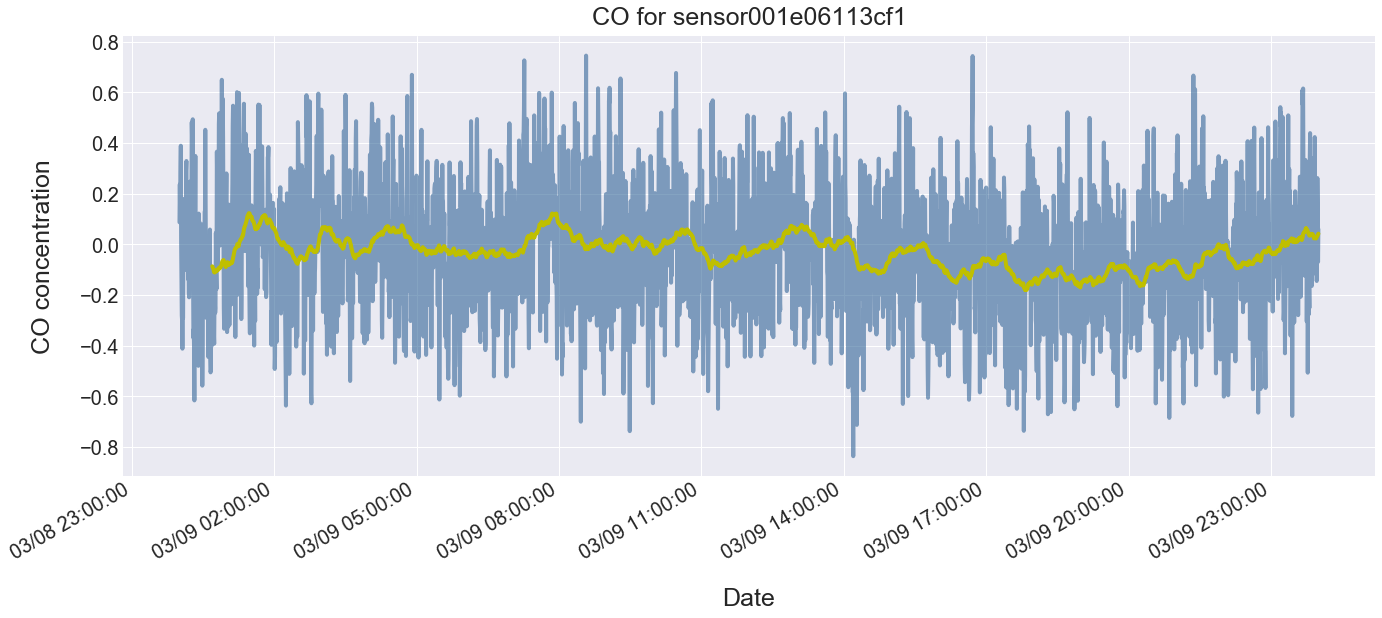

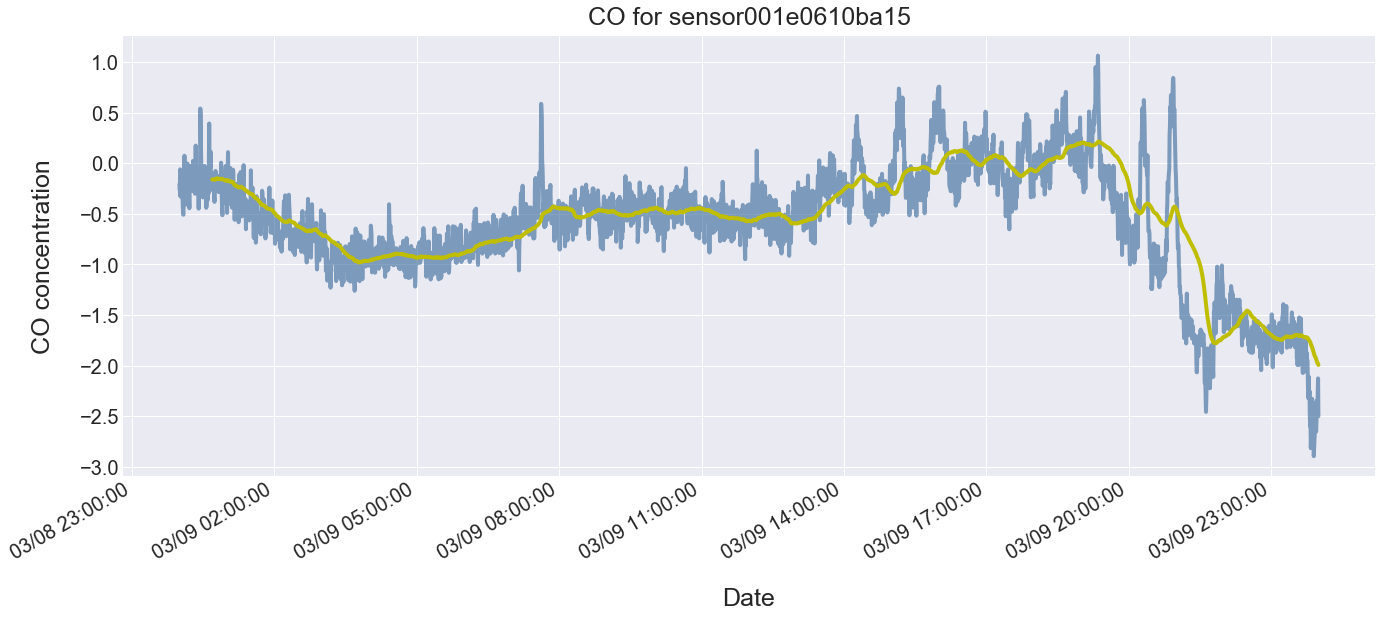

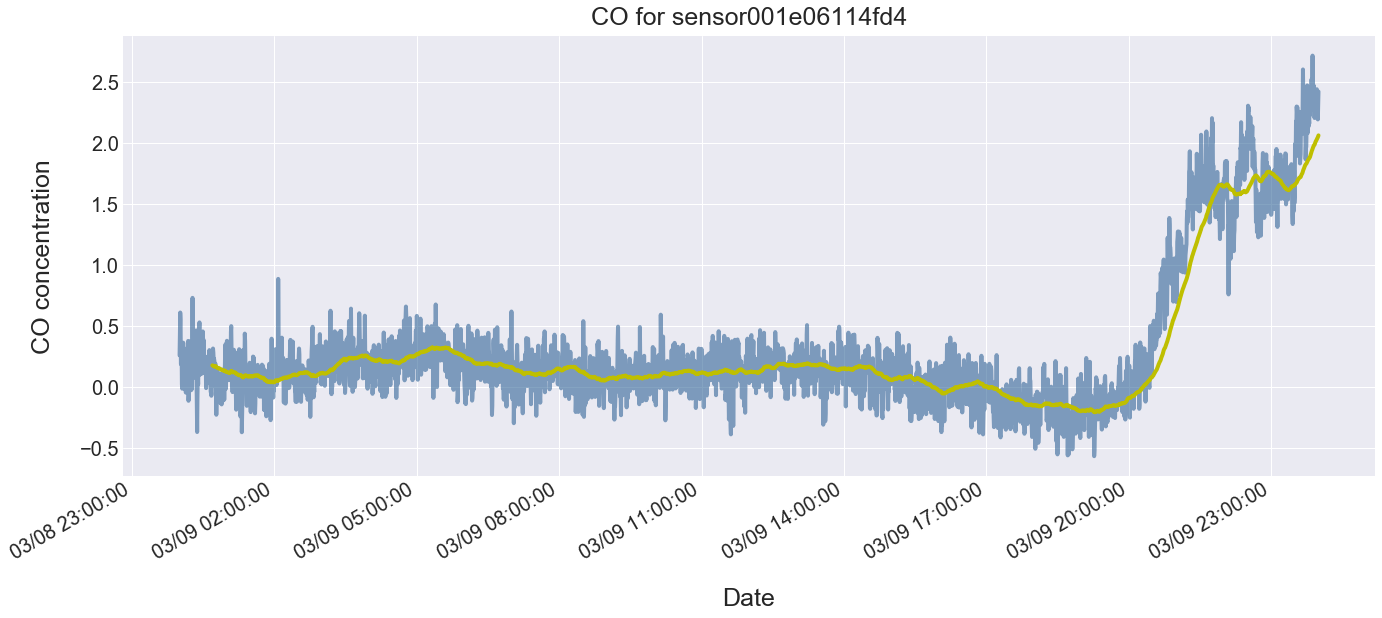

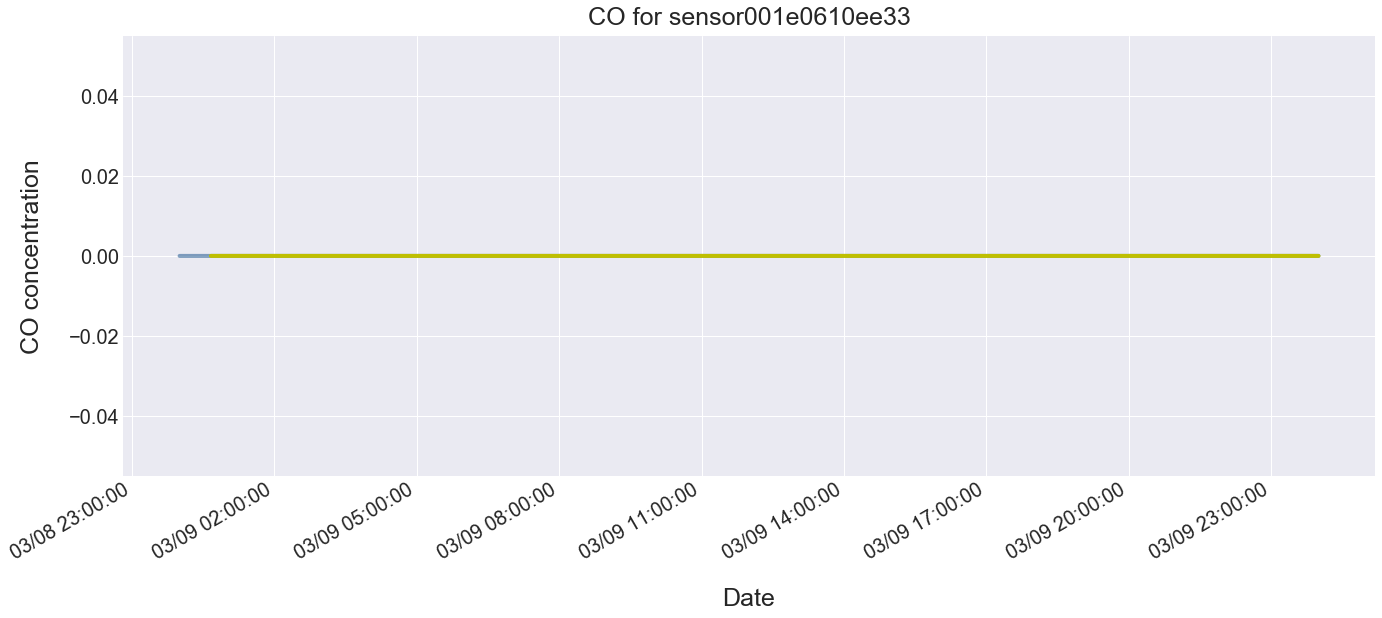

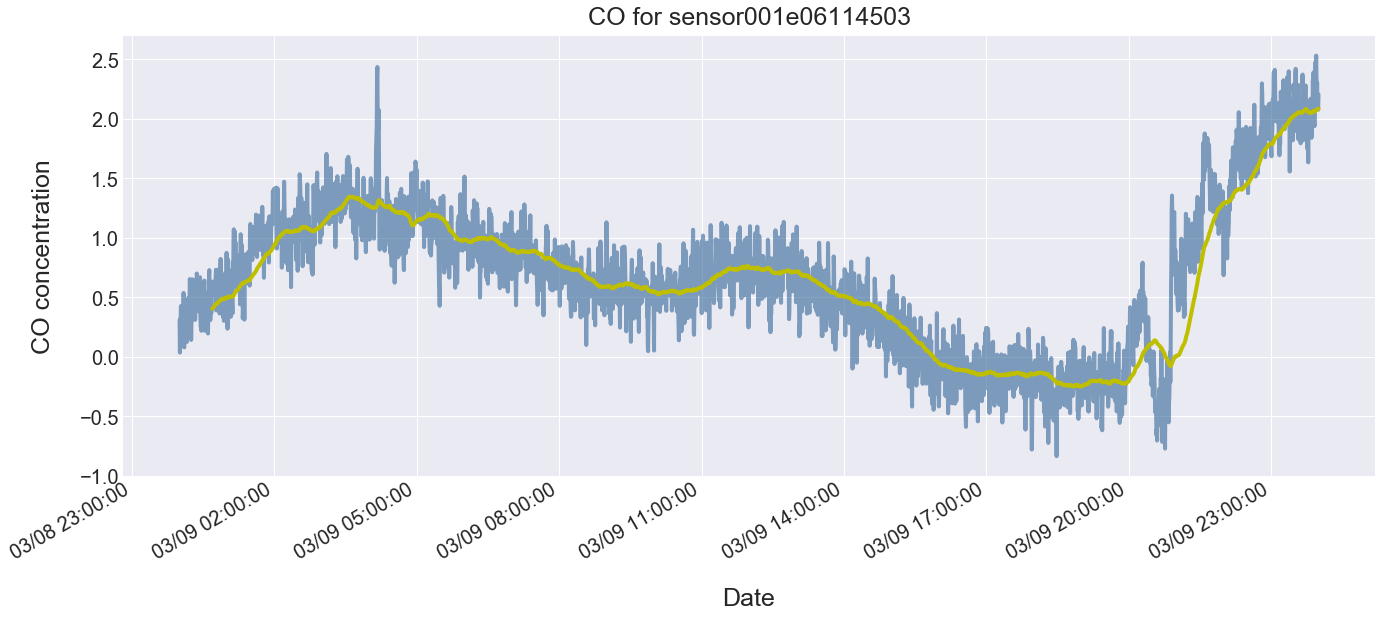

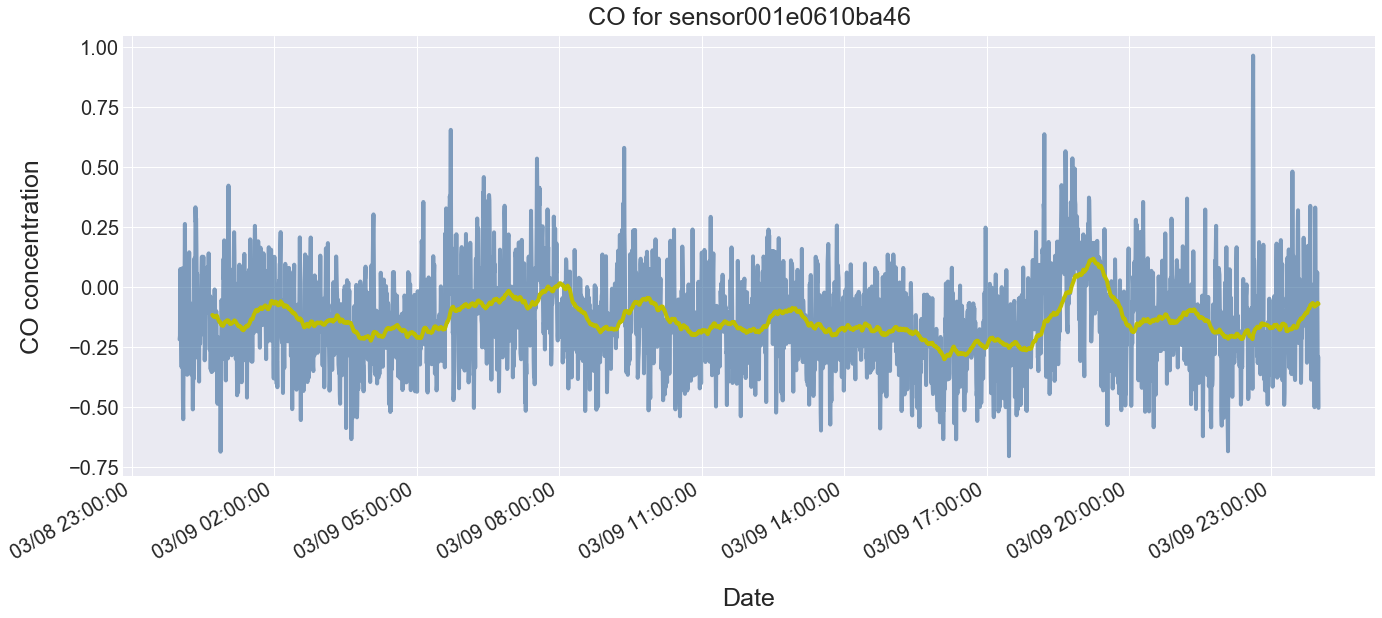

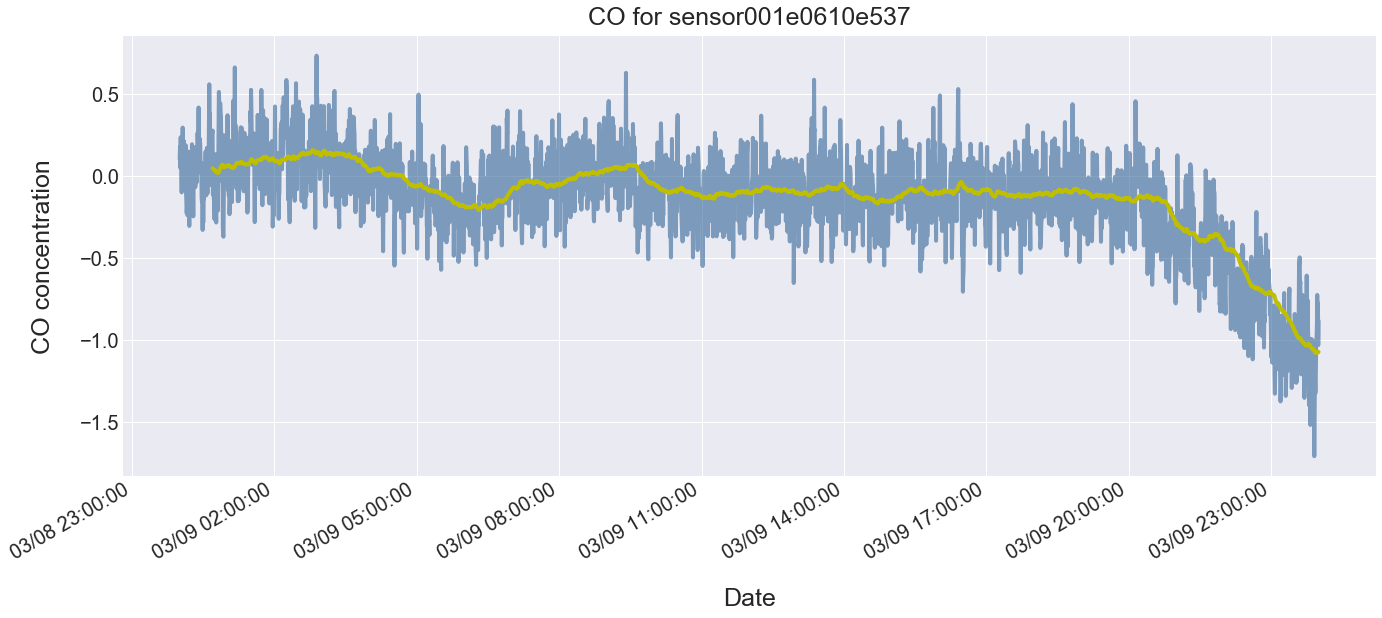

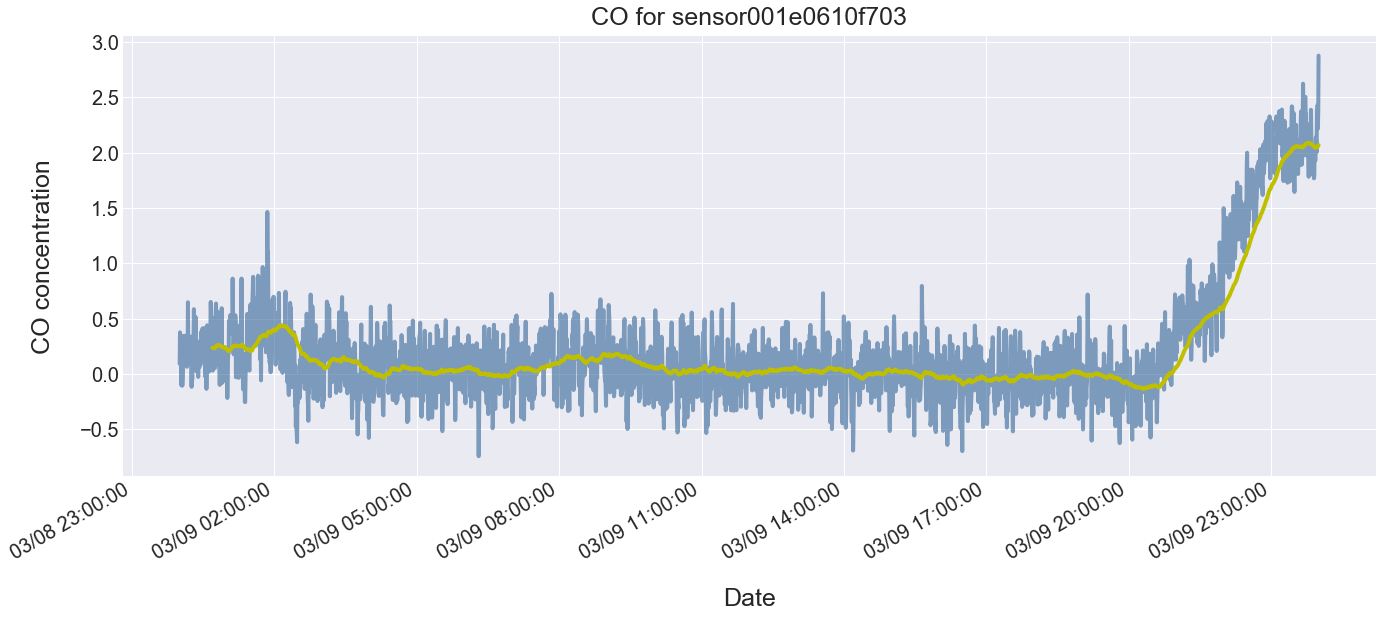

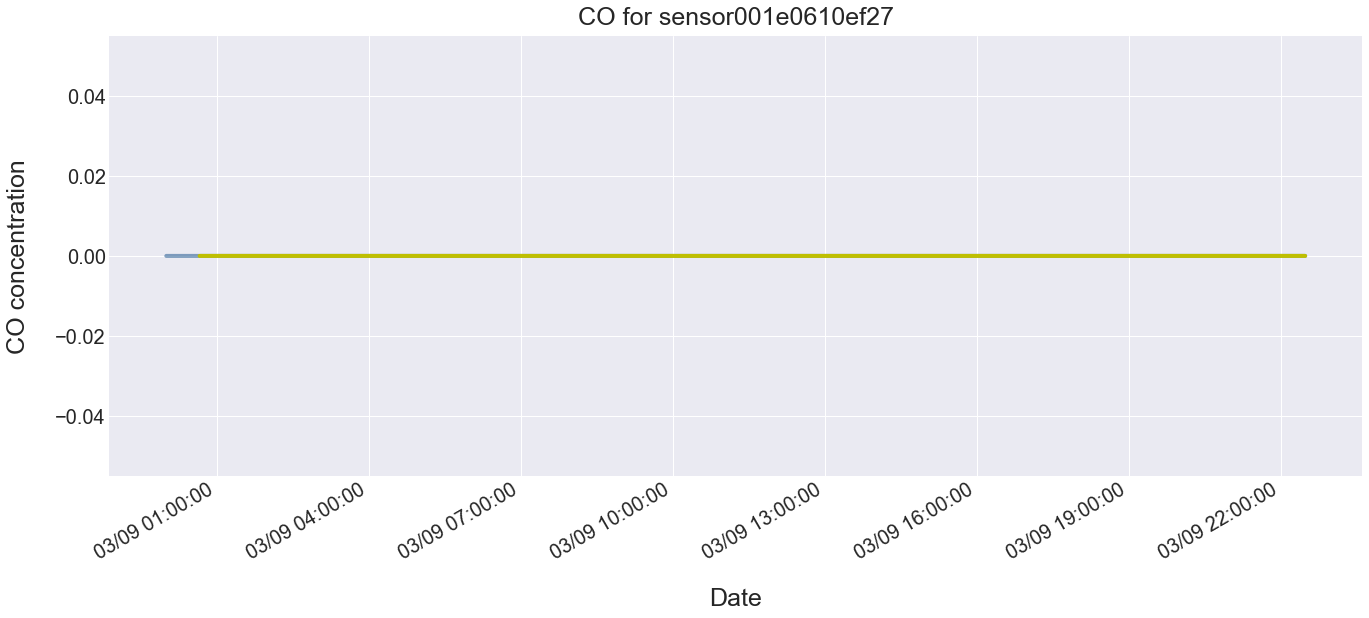

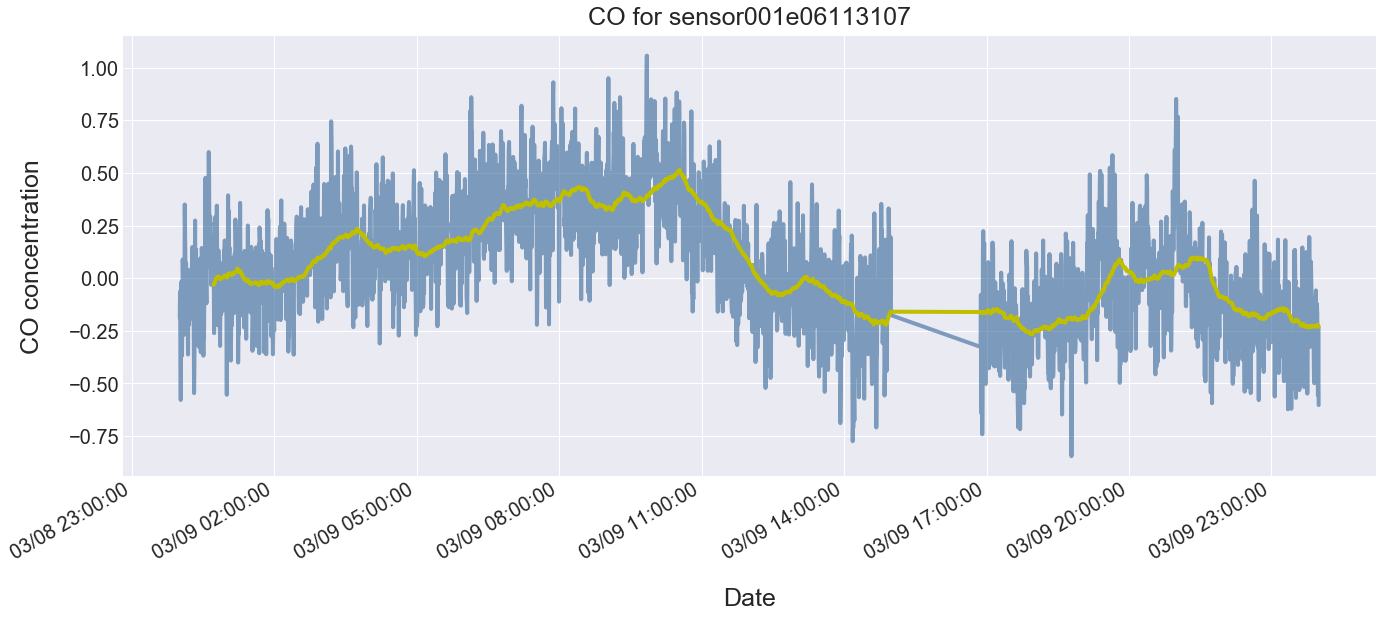

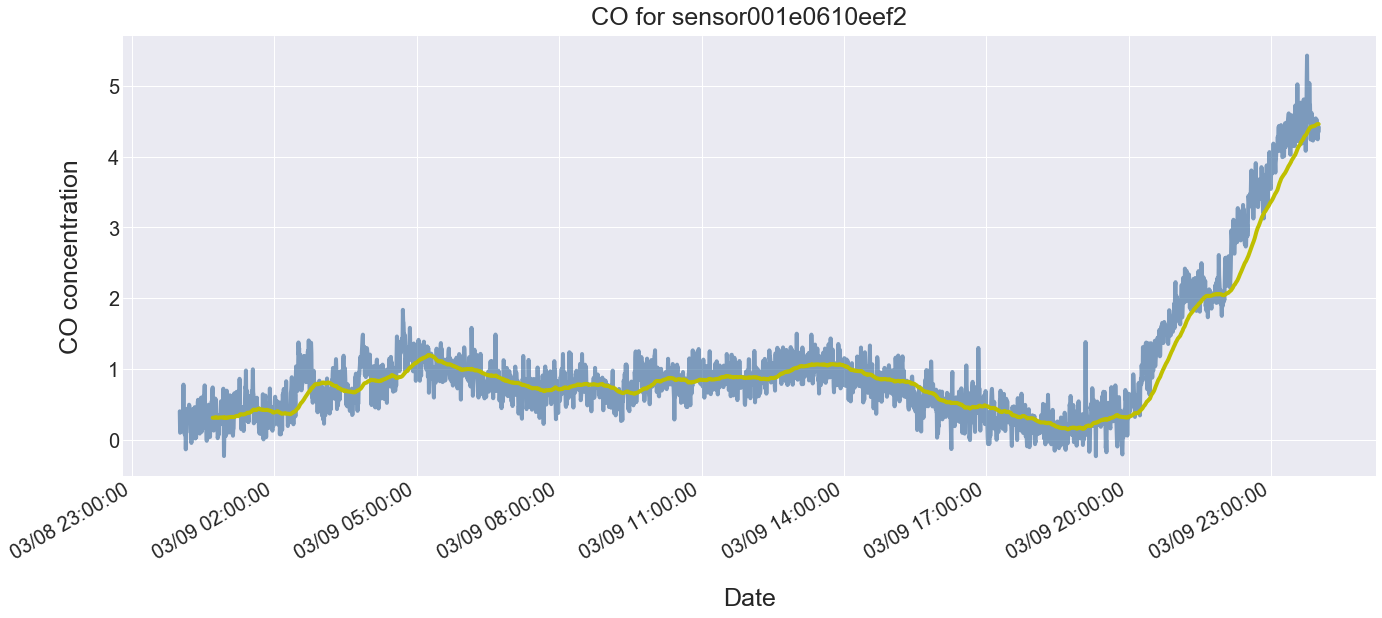

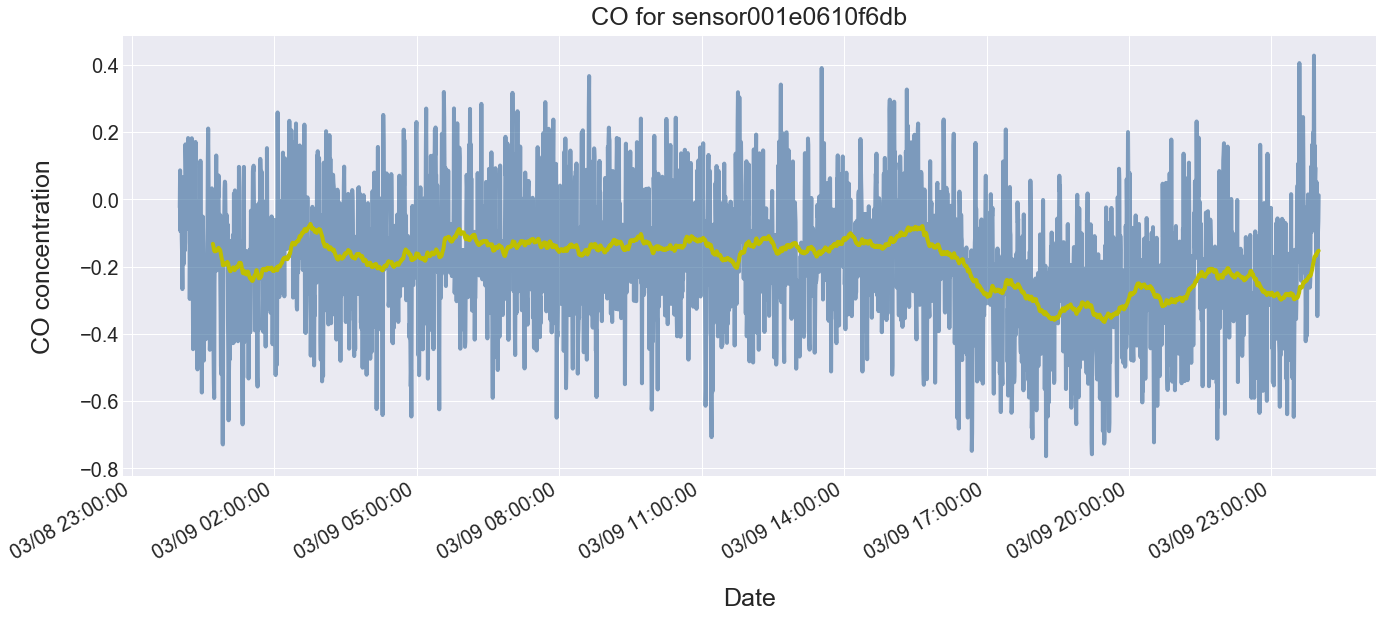

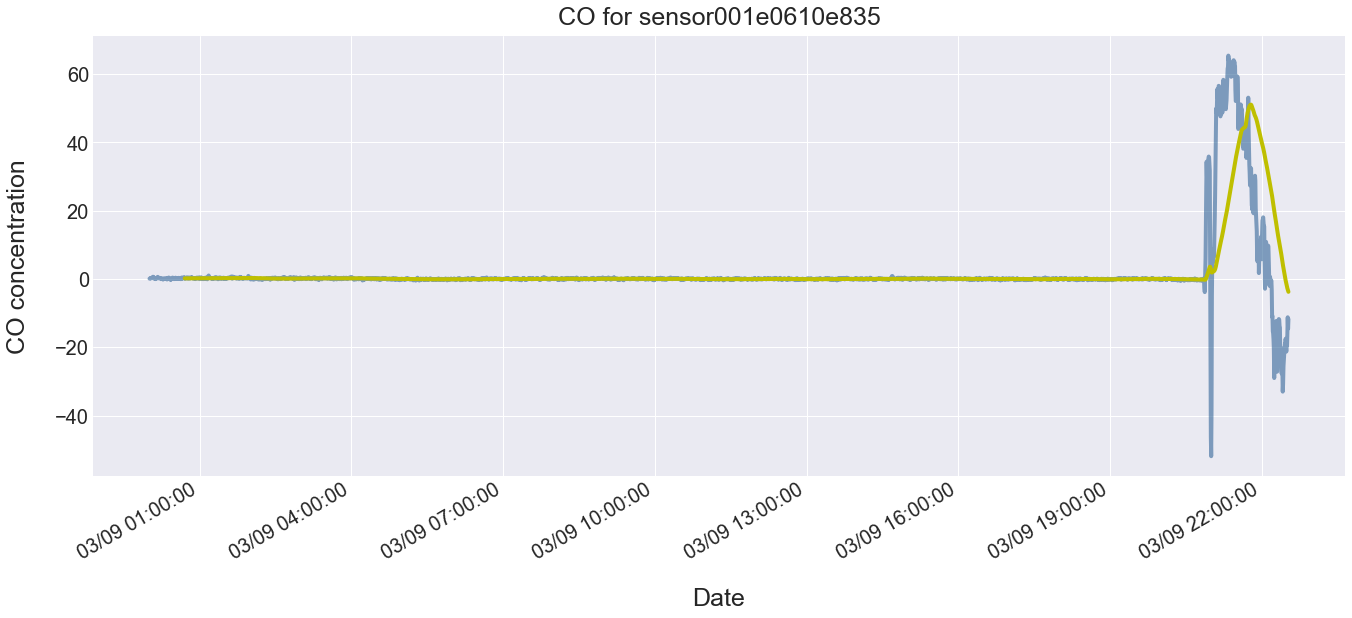

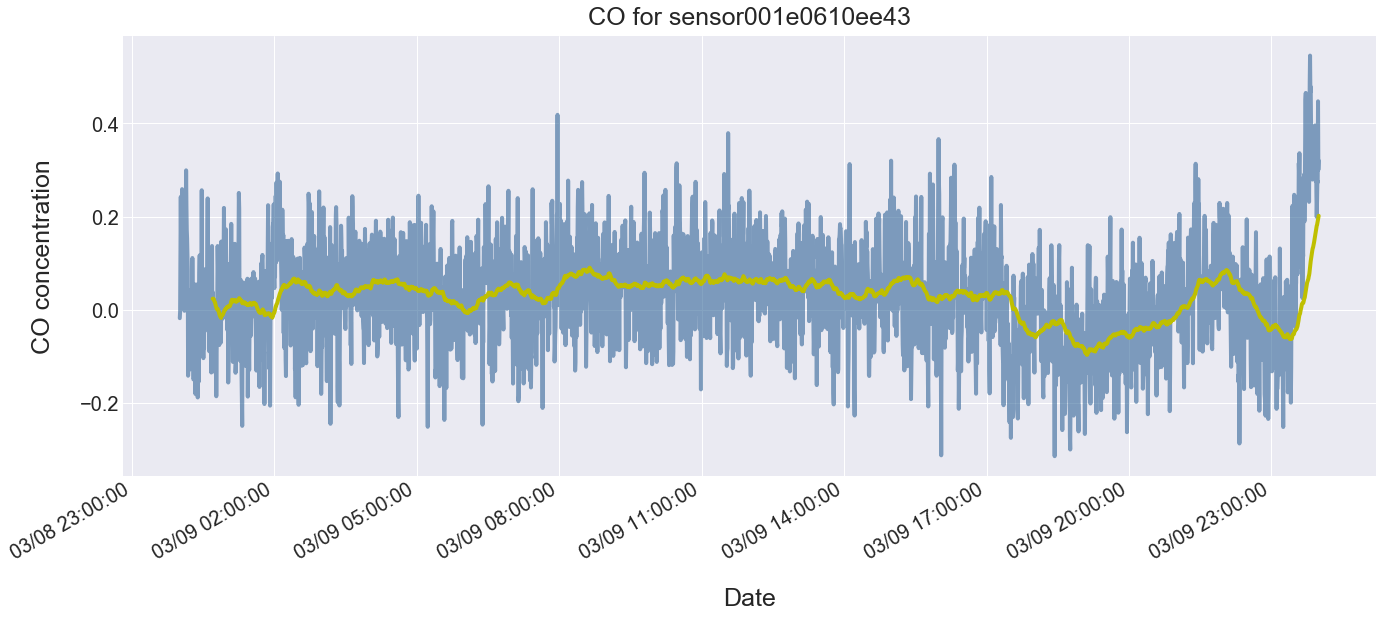

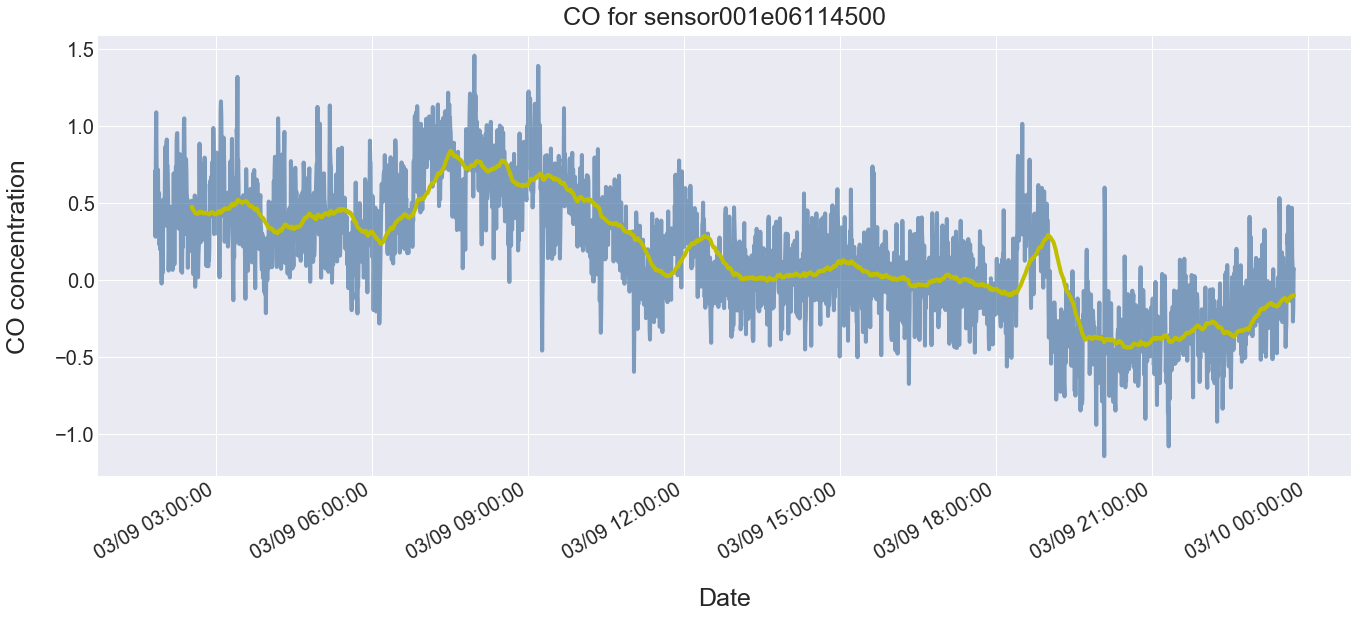

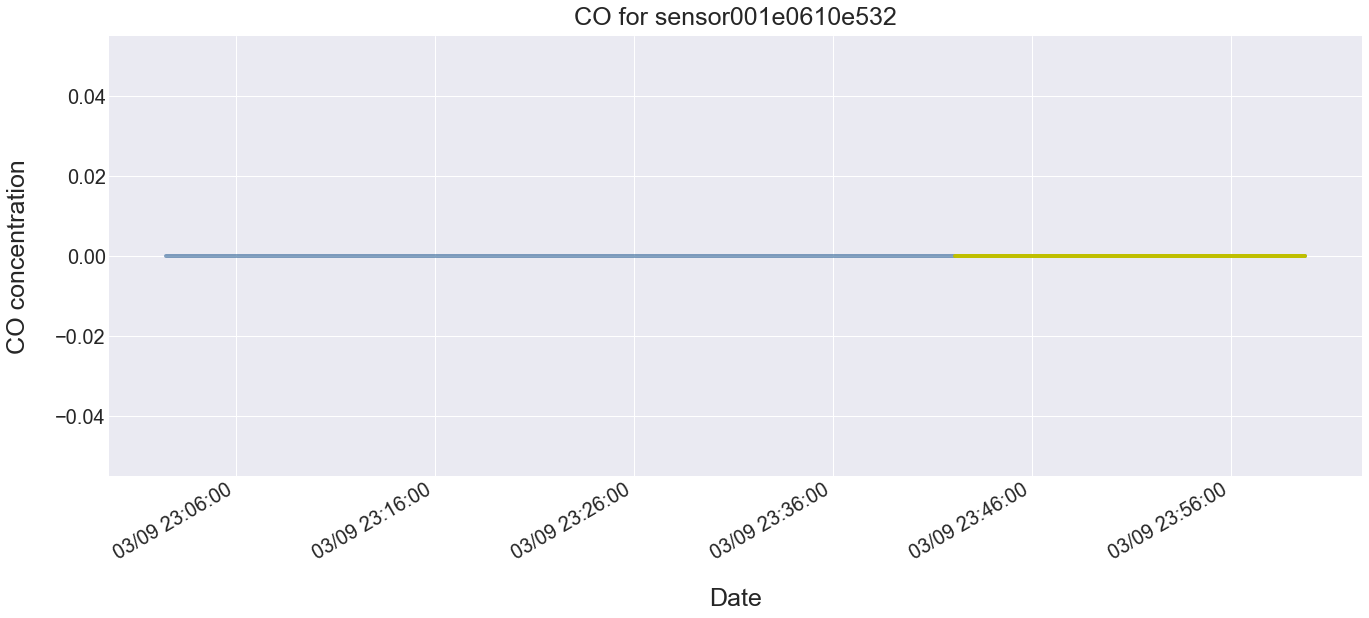

In [61]:
for node in CO_nodes:
    CO_data_node = CO_data.loc[CO_data['node_id'] == node].copy()
    CO_data_node.timestamp = pd.to_datetime(CO_data_node.timestamp)

    CO_data_node.value_hrf = pd.to_numeric(CO_data_node['value_hrf'], errors='coerce').fillna(0)
    plt.style.use('seaborn-darkgrid')

    # Convert that column into a datetime datatype
    CO_data_node['timestamp'] = pd.to_datetime(CO_data_node['timestamp'])
    # Set the datetime column as the index
    CO_data_node.index = CO_data_node['timestamp']
    CO_data_node['MA'] = CO_data_node['value_hrf'].rolling(window=100).mean()

    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    CO_data_node.value_hrf.plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)
    CO_data_node.MA.plot(ax = ax, figsize=[20,9], color="y", linewidth=4)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M:%S'))

    plt.tick_params(axis='both', which='both', labelsize=20)

    # Set title and labels
    ax.set_title('CO for sensor' + node,fontsize = 25, fontdict = {'verticalalignment':'bottom'})
    ax.set_xlabel('Date',fontsize = 25, labelpad=25)
    ax.set_ylabel('CO concentration',fontsize = 25, labelpad=25)

In [62]:
H2S_data = air_data.loc[air_data['sensor'] == 'h2s']
H2S_nodes = H2S_data.node_id.unique()

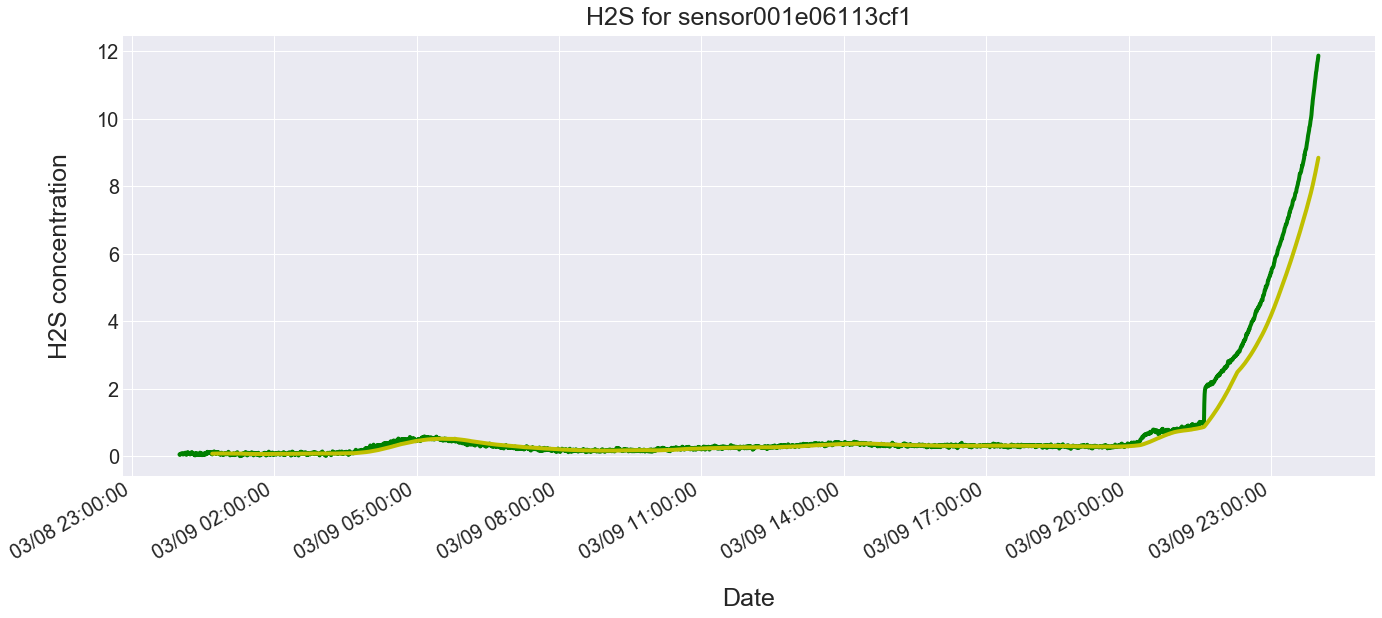

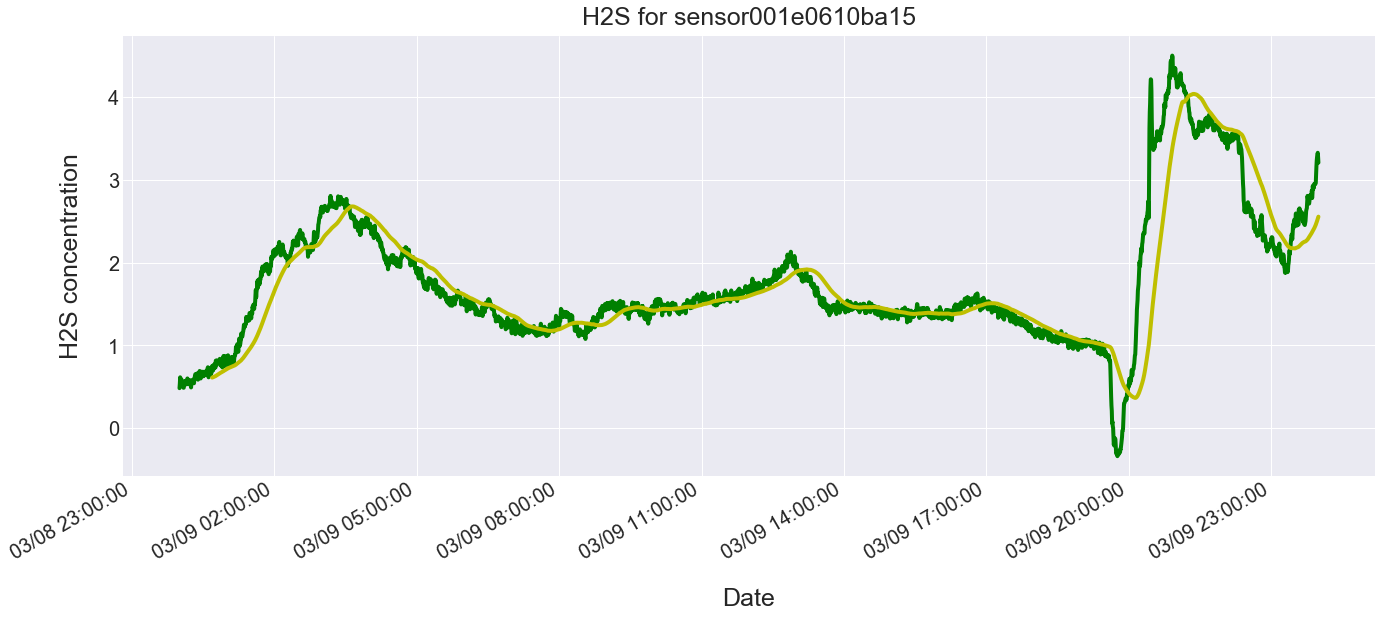

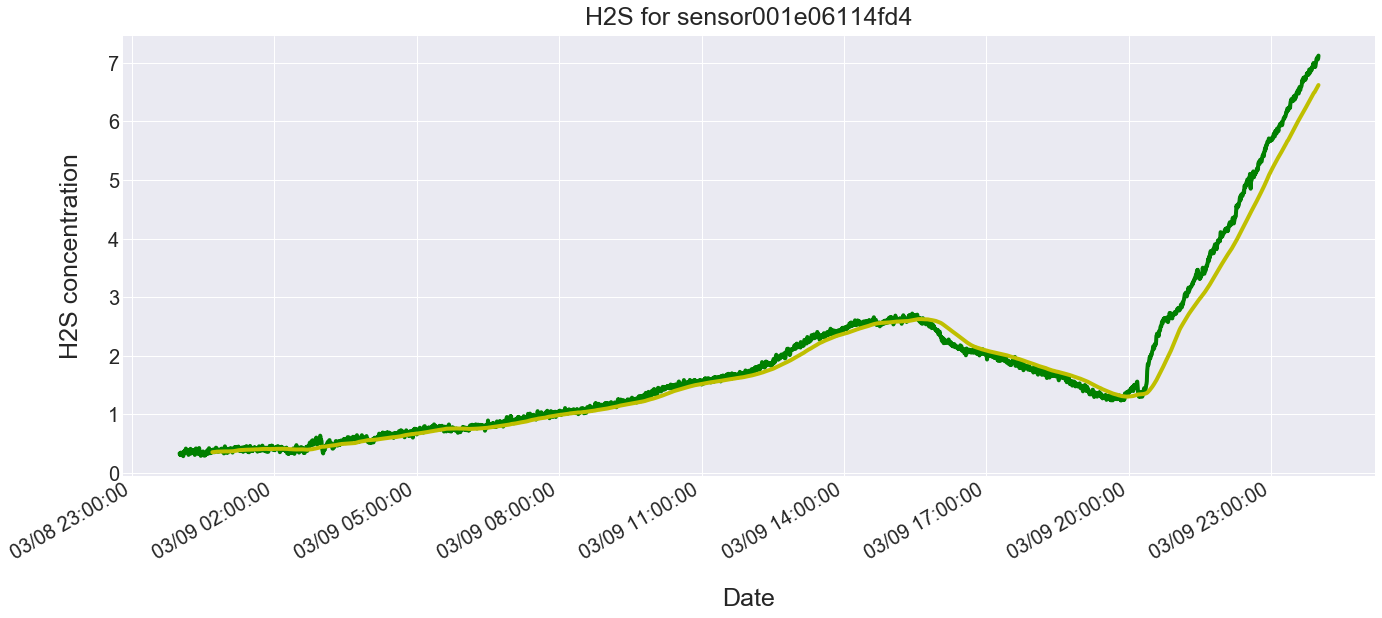

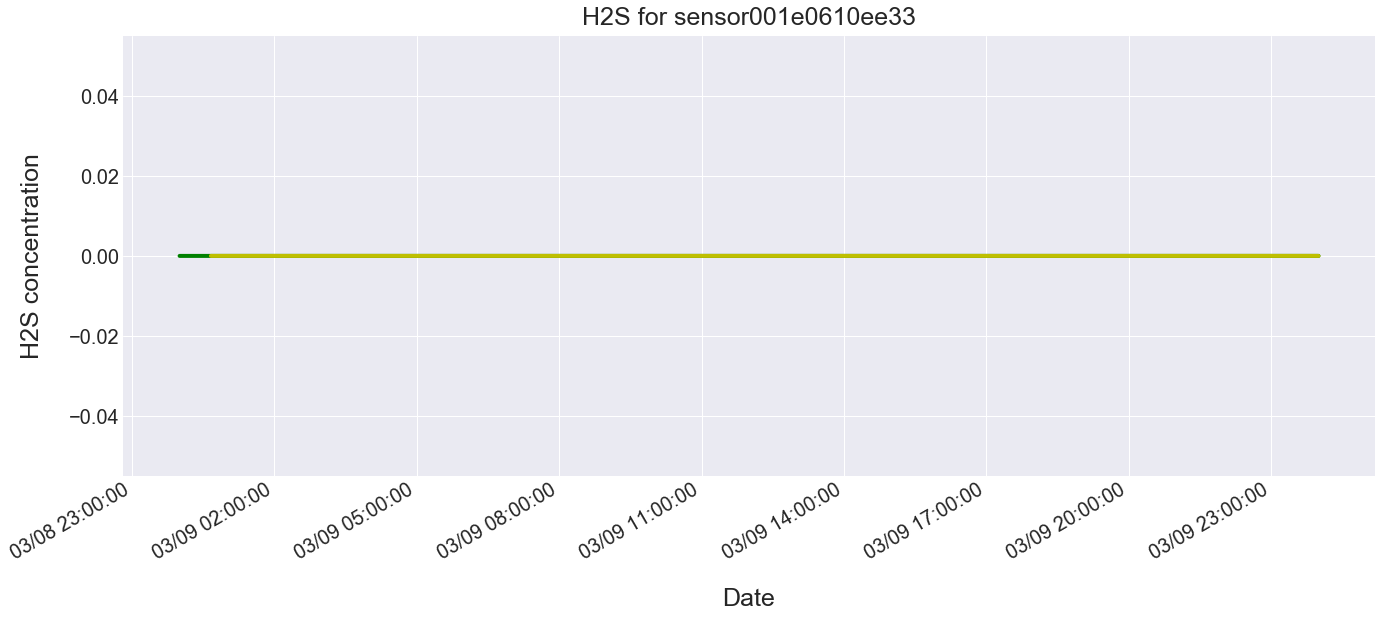

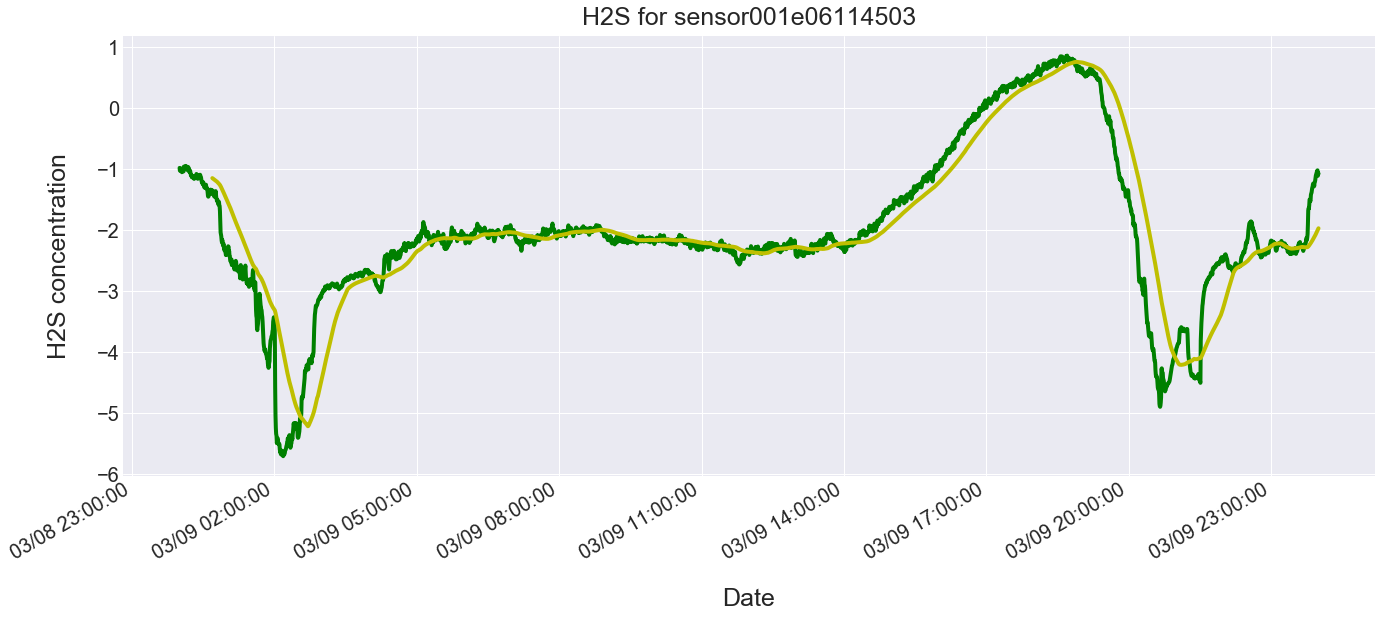

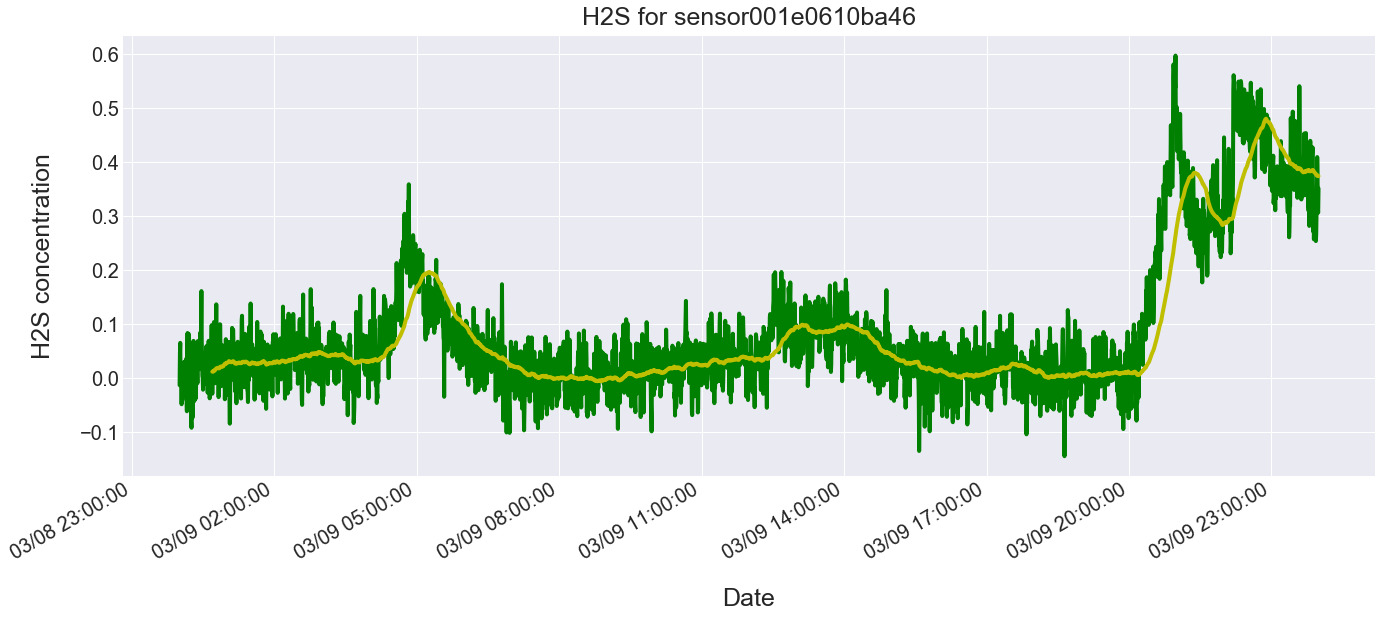

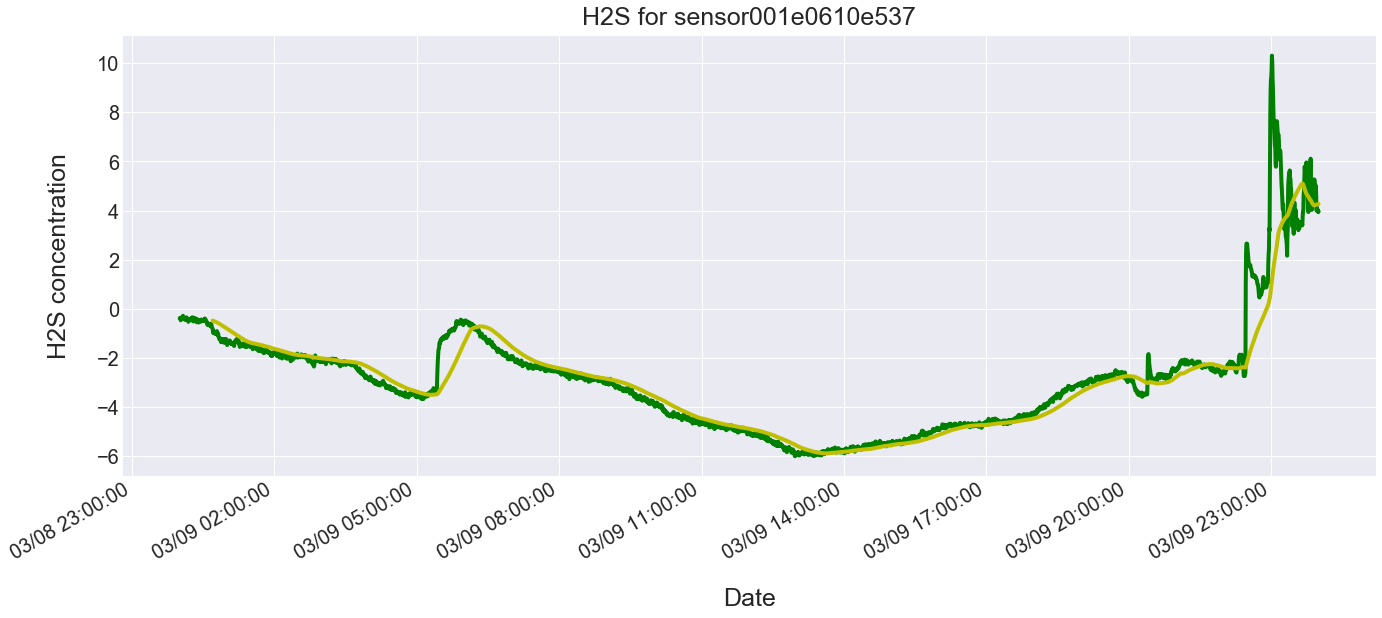

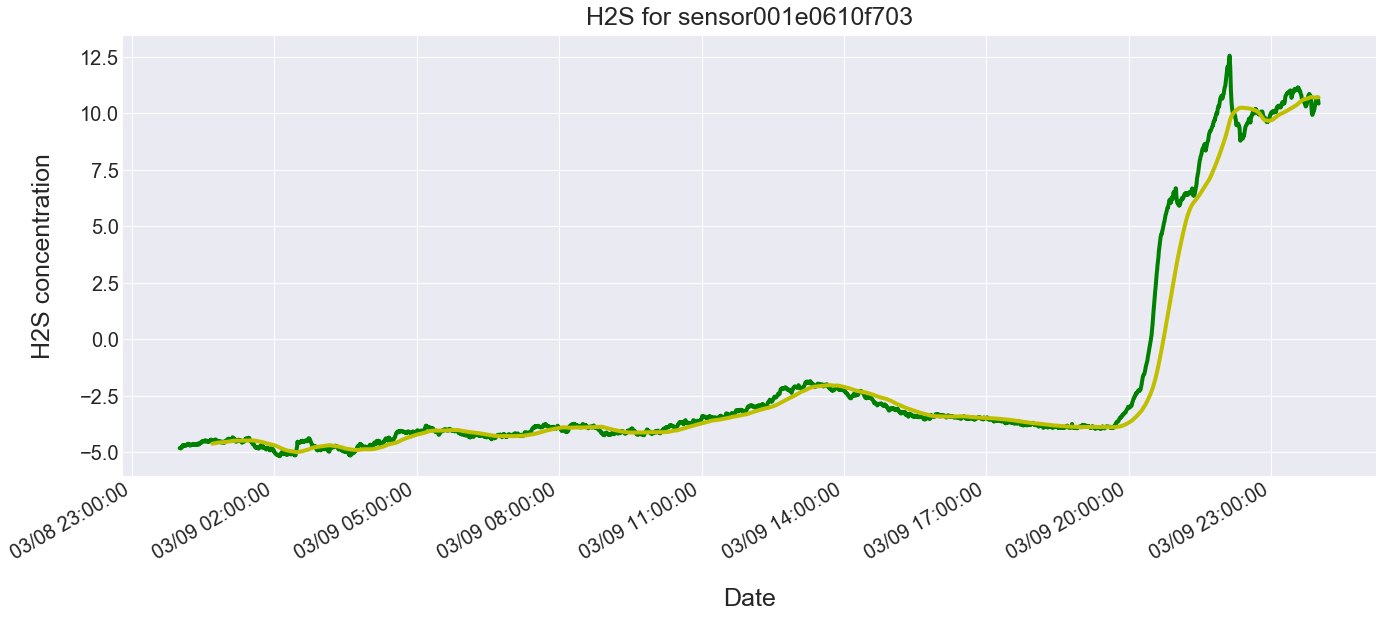

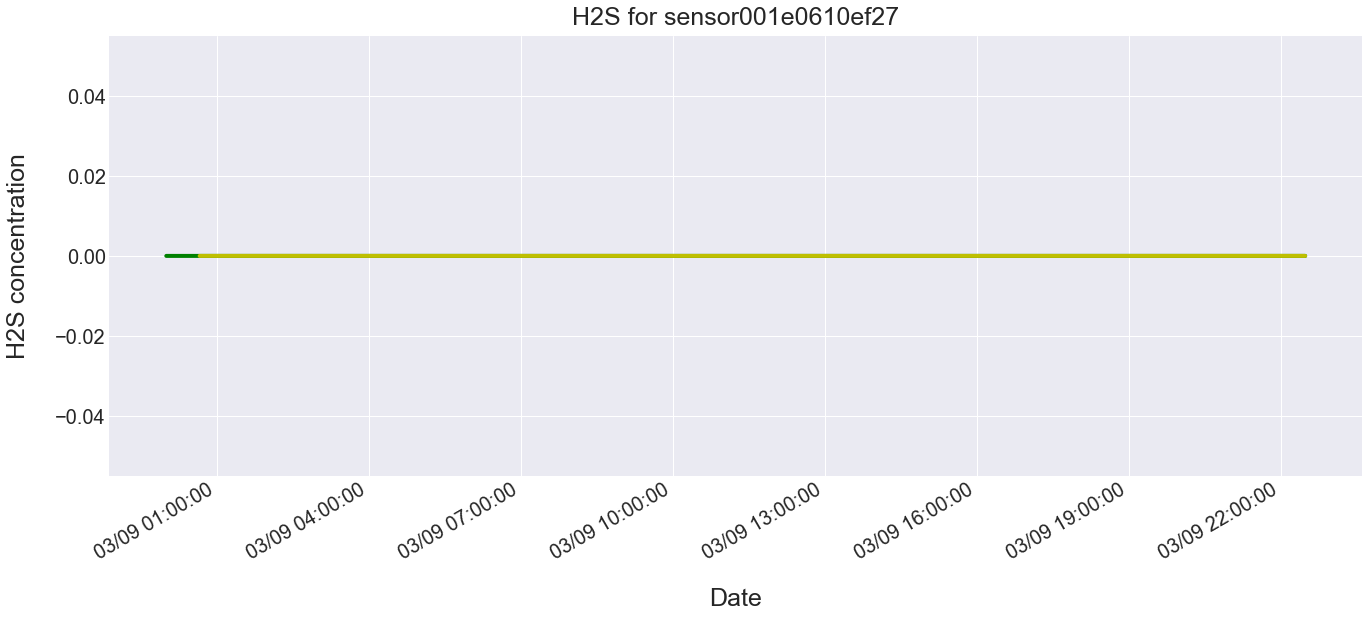

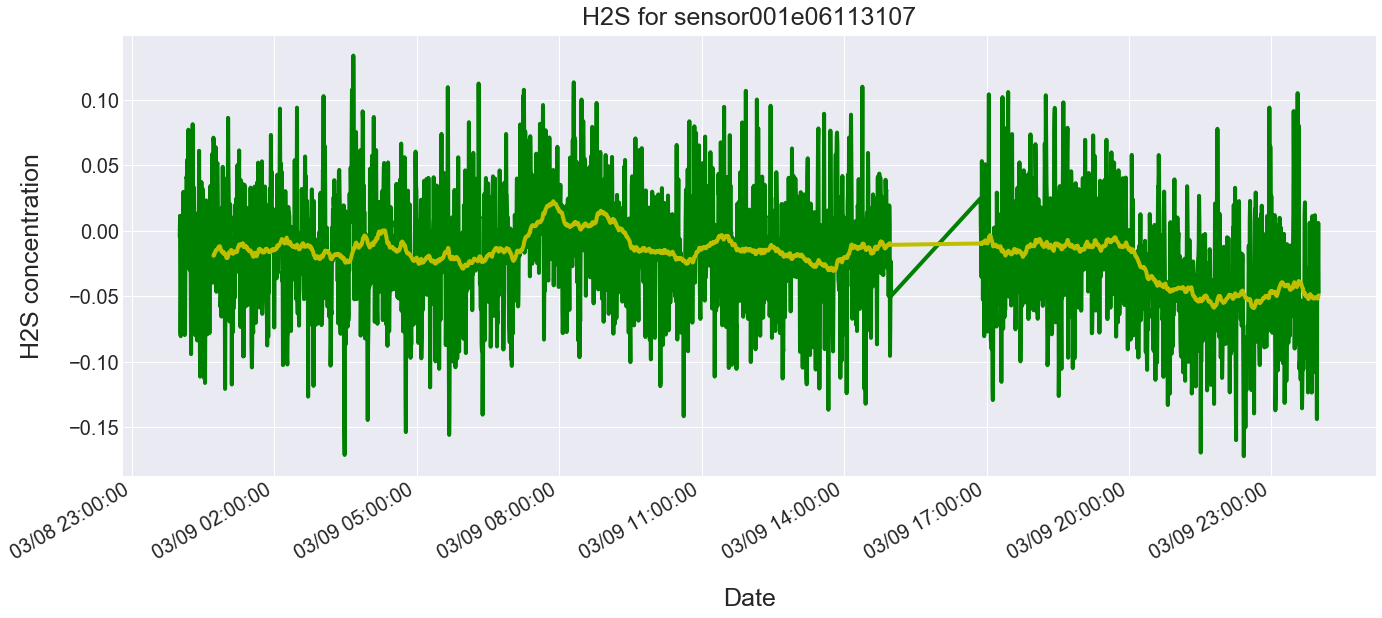

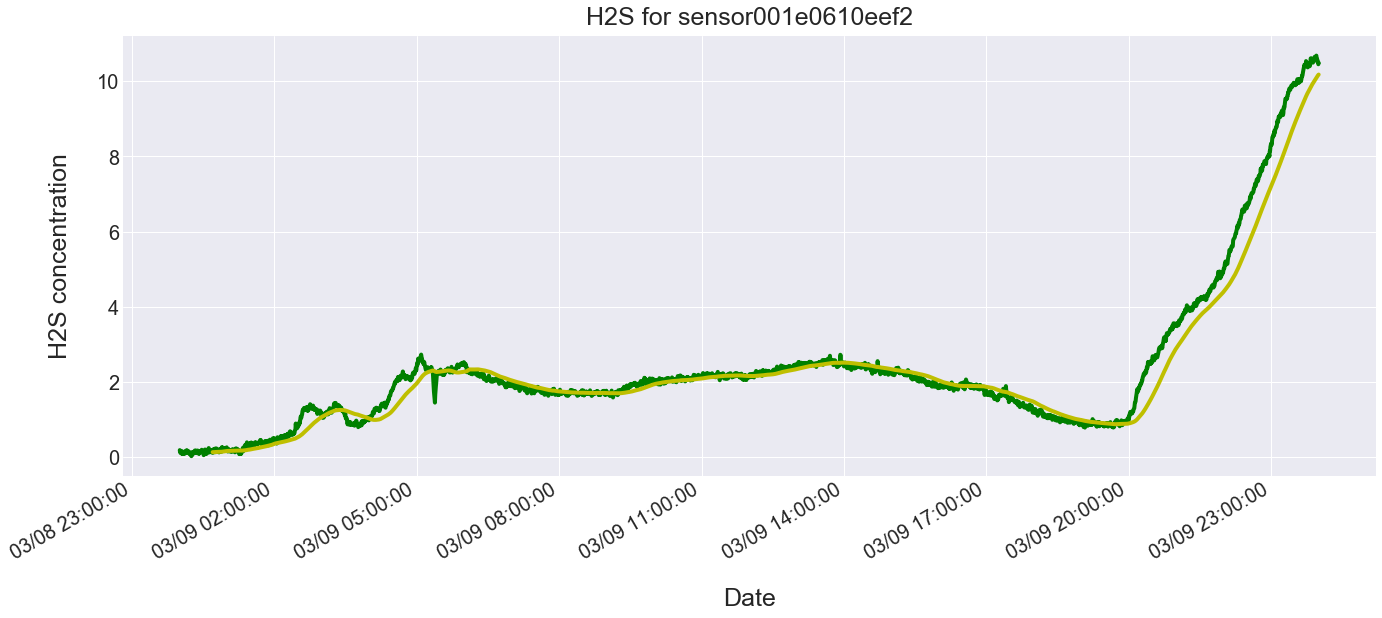

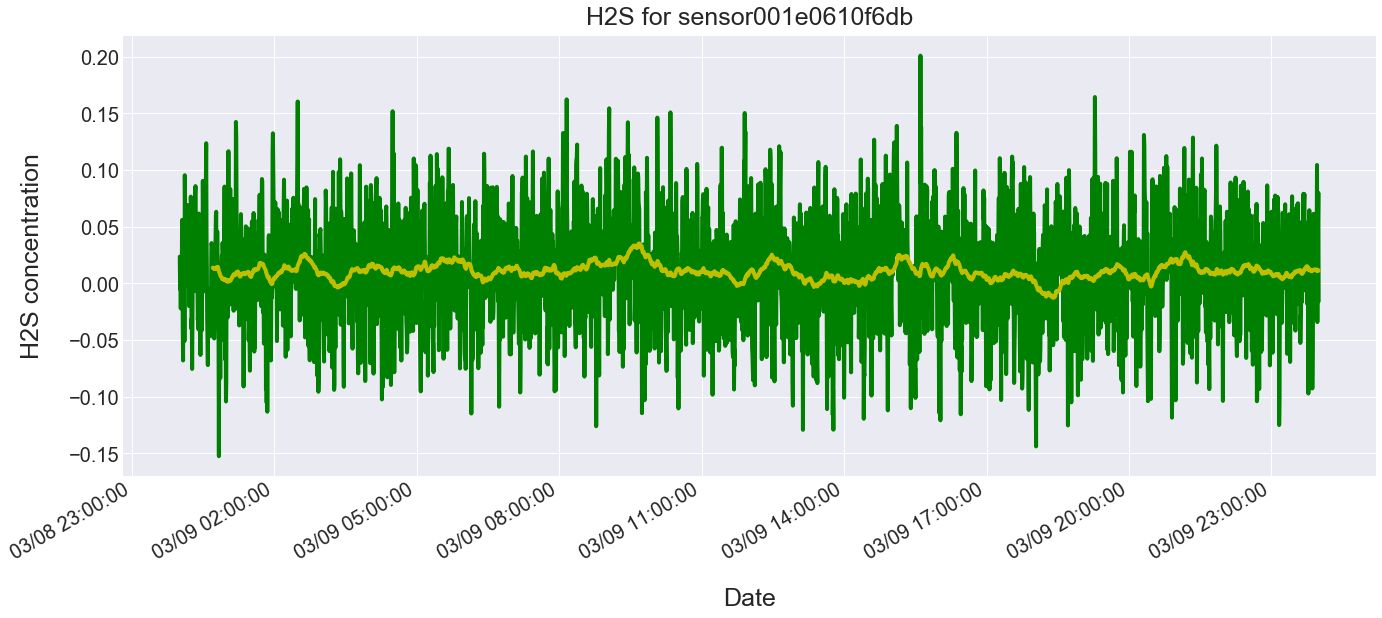

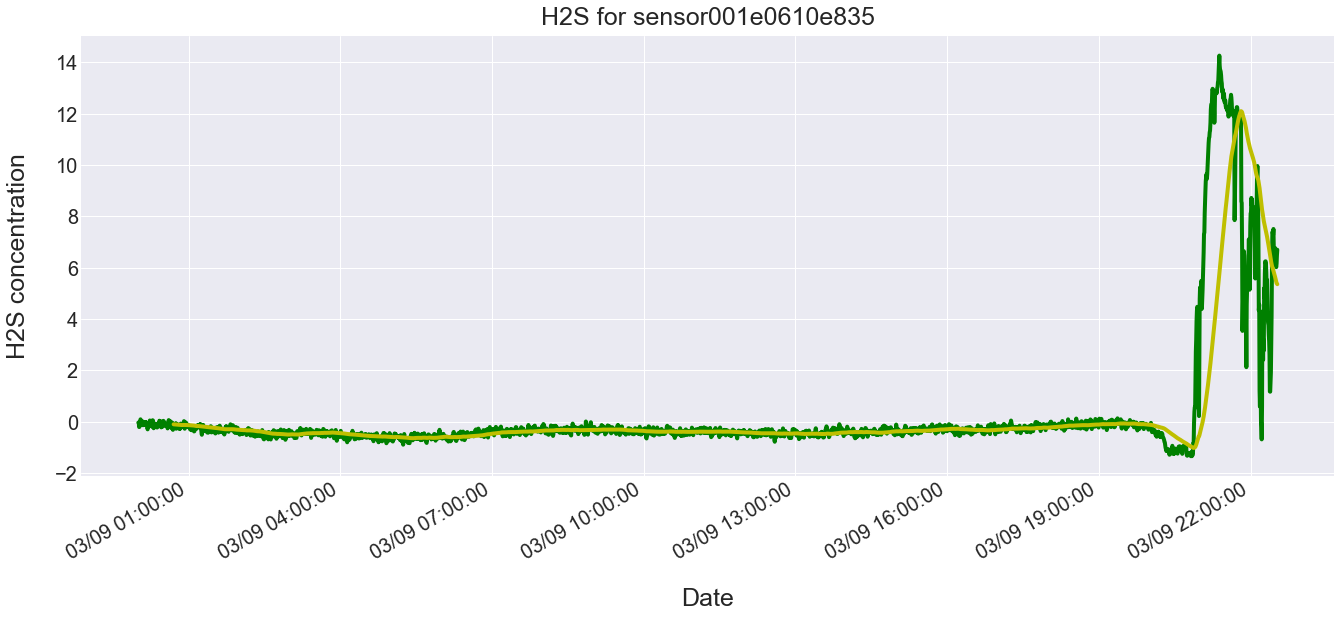

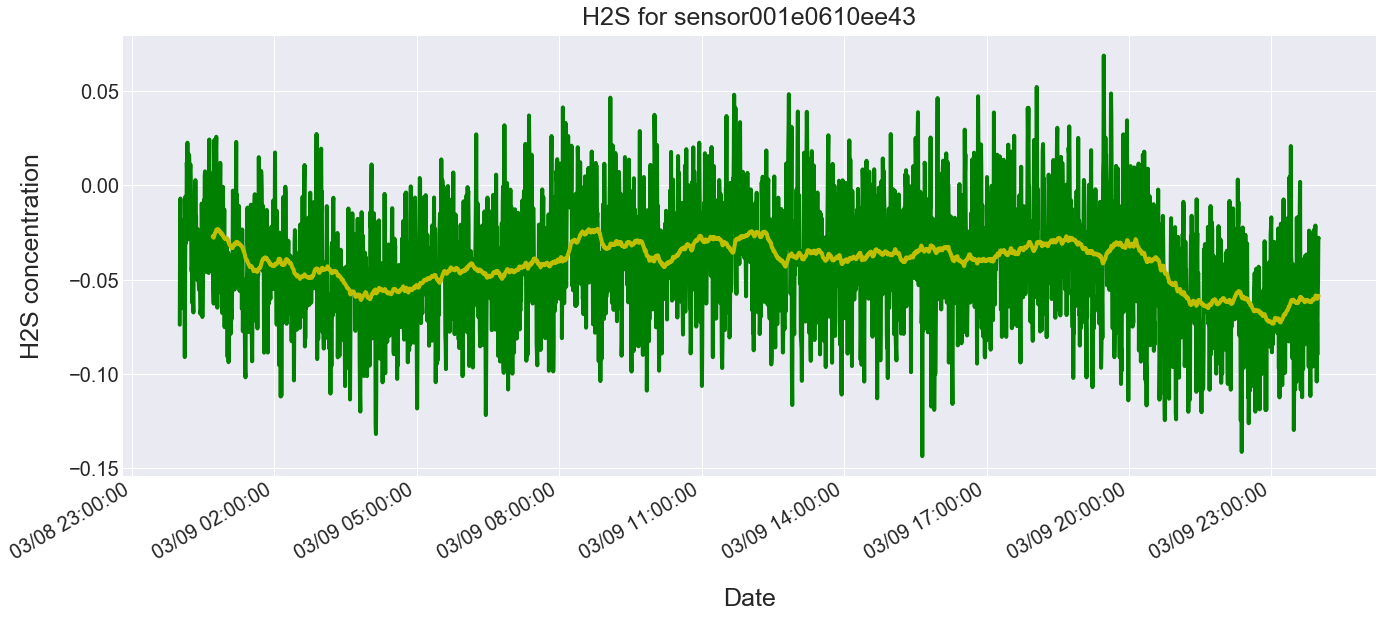

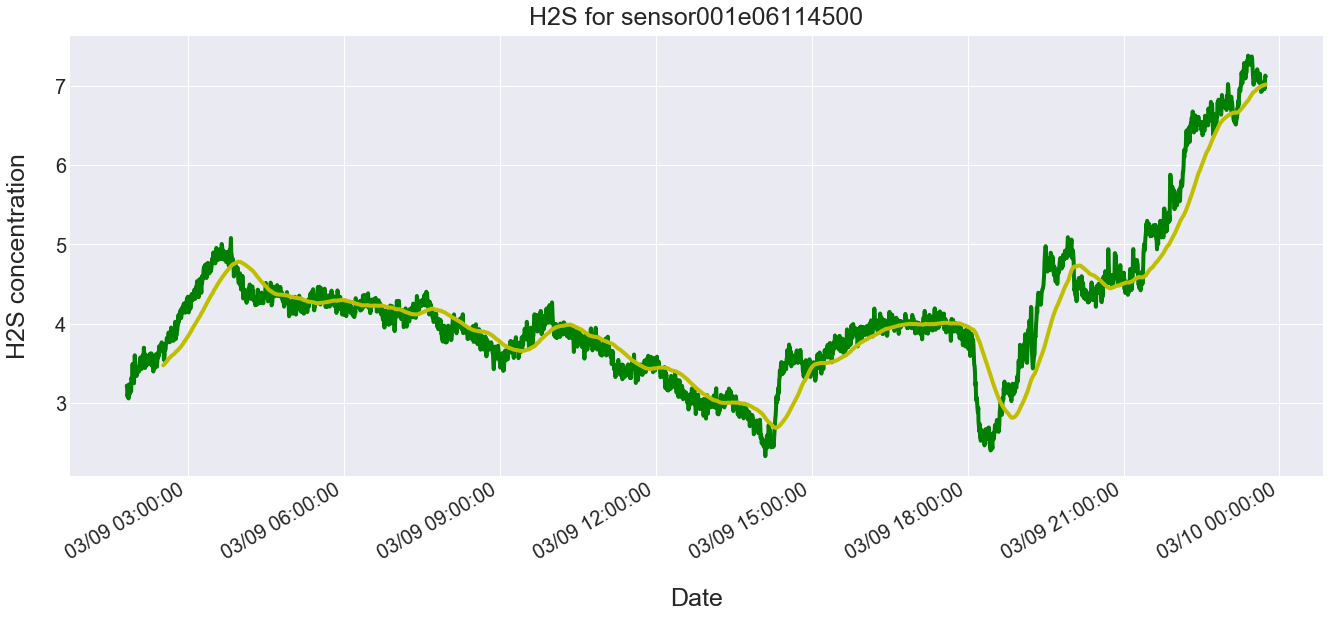

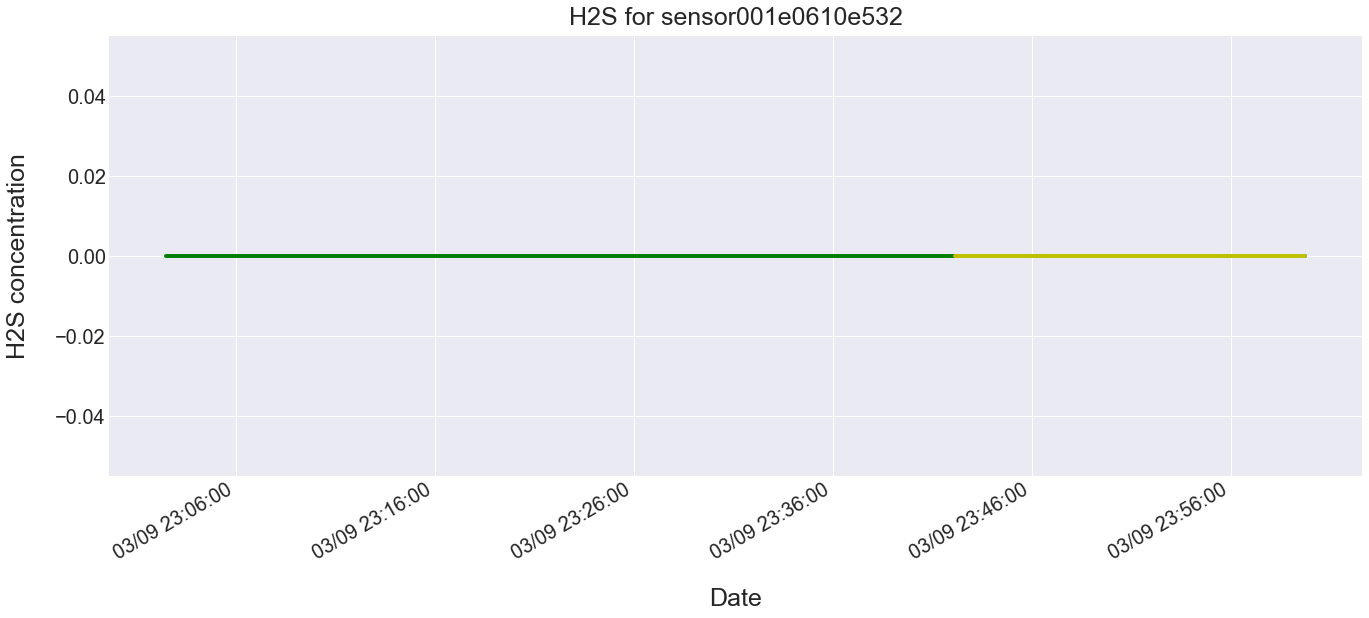

In [64]:
for node in H2S_nodes:
    H2S_data_node = H2S_data.loc[H2S_data['node_id'] == node].copy()
    H2S_data_node.timestamp = pd.to_datetime(H2S_data_node.timestamp)

    H2S_data_node.value_hrf = pd.to_numeric(H2S_data_node['value_hrf'], errors='coerce').fillna(0)
    plt.style.use('seaborn-darkgrid')

    # Convert that column into a datetime datatype
    H2S_data_node['timestamp'] = pd.to_datetime(H2S_data_node['timestamp'])
    # Set the datetime column as the index
    H2S_data_node.index = H2S_data_node['timestamp']
    H2S_data_node['MA'] = H2S_data_node['value_hrf'].rolling(window=100).mean()

    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    H2S_data_node.value_hrf.plot(ax = ax, figsize=[20,9], color="g", linewidth=4)
    H2S_data_node.MA.plot(ax = ax, figsize=[20,9], color="y", linewidth=4)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M:%S'))

    plt.tick_params(axis='both', which='both', labelsize=20)

    # Set title and labels
    ax.set_title('H2S for sensor' + node,fontsize = 25, fontdict = {'verticalalignment':'bottom'})
    ax.set_xlabel('Date',fontsize = 25, labelpad=25)
    ax.set_ylabel('H2S concentration',fontsize = 25, labelpad=25)

In [65]:
NO2_data = air_data.loc[air_data['sensor'] == 'no2']
NO2_nodes = NO2_data.node_id.unique()

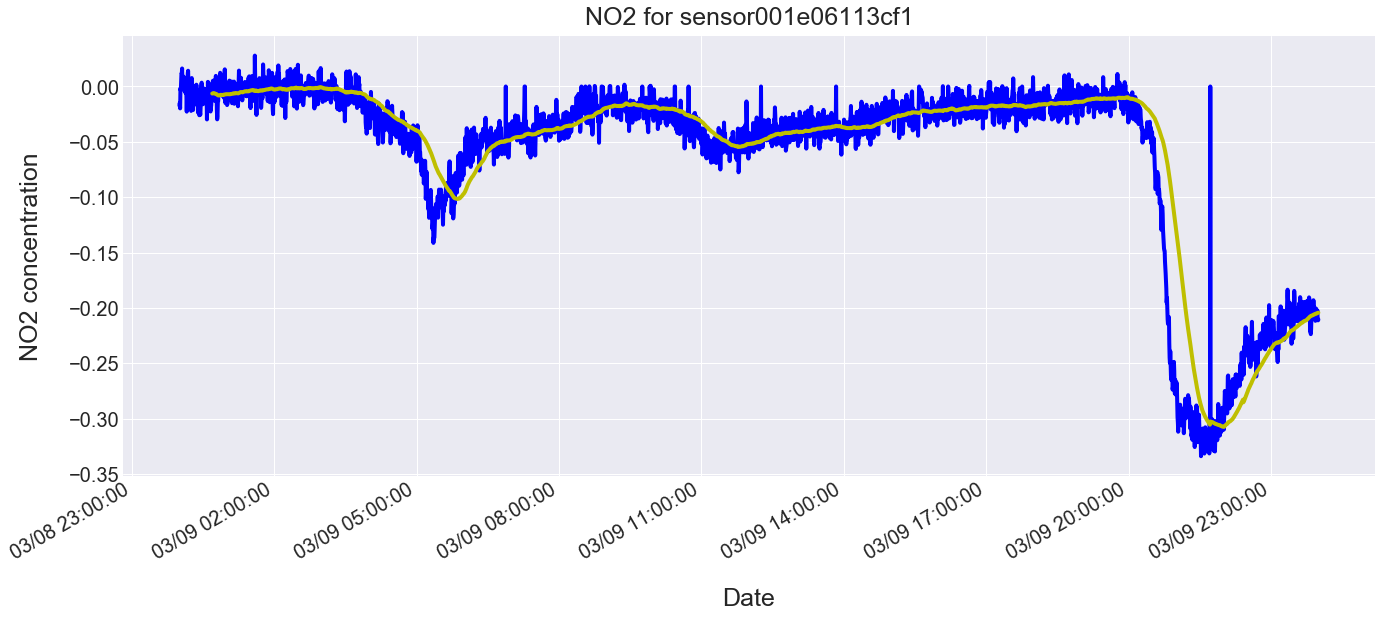

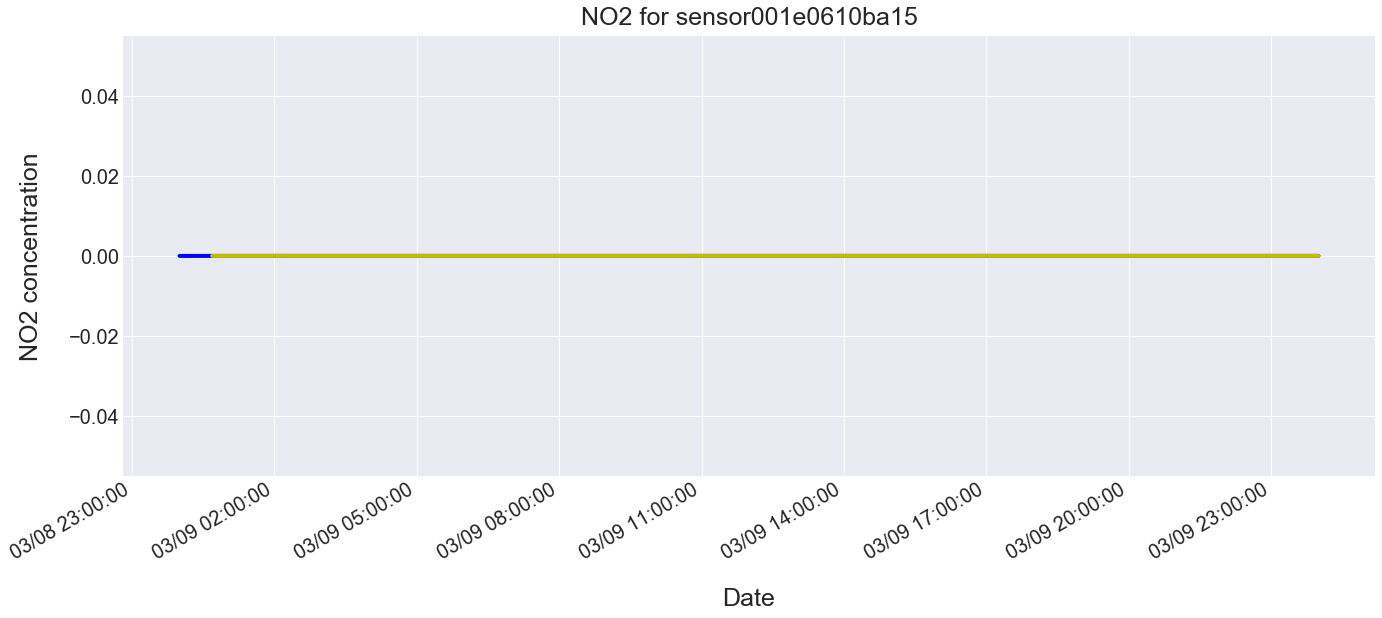

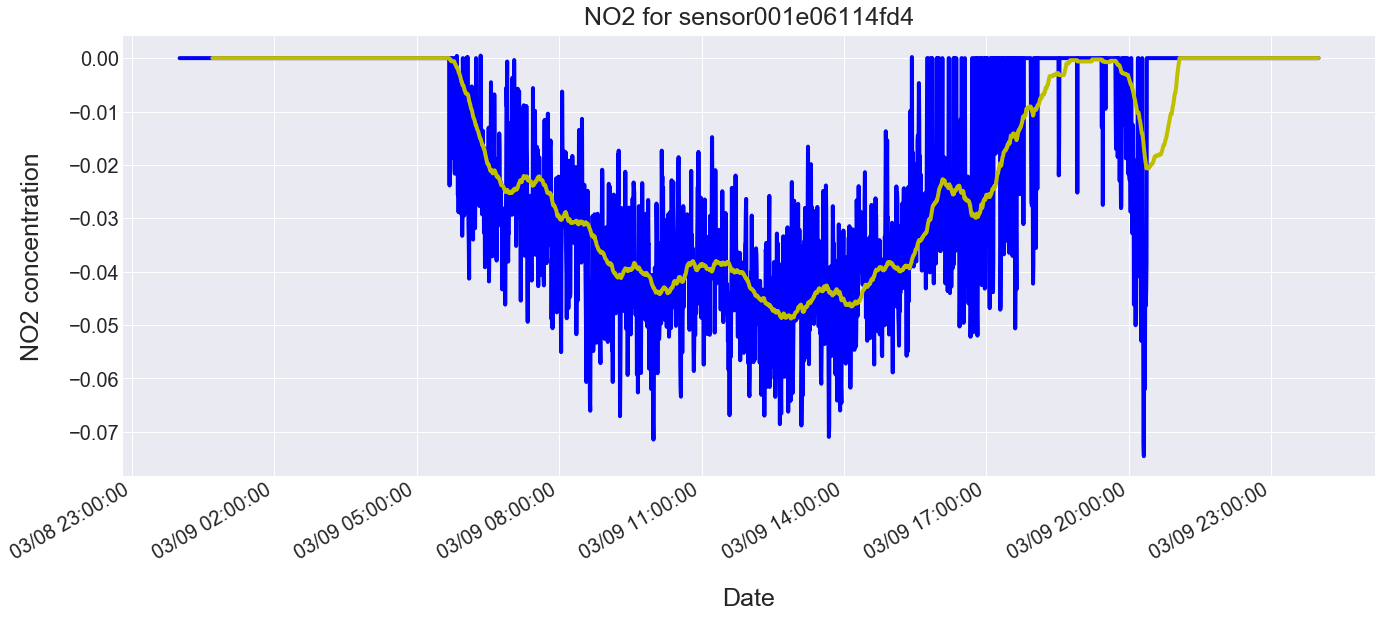

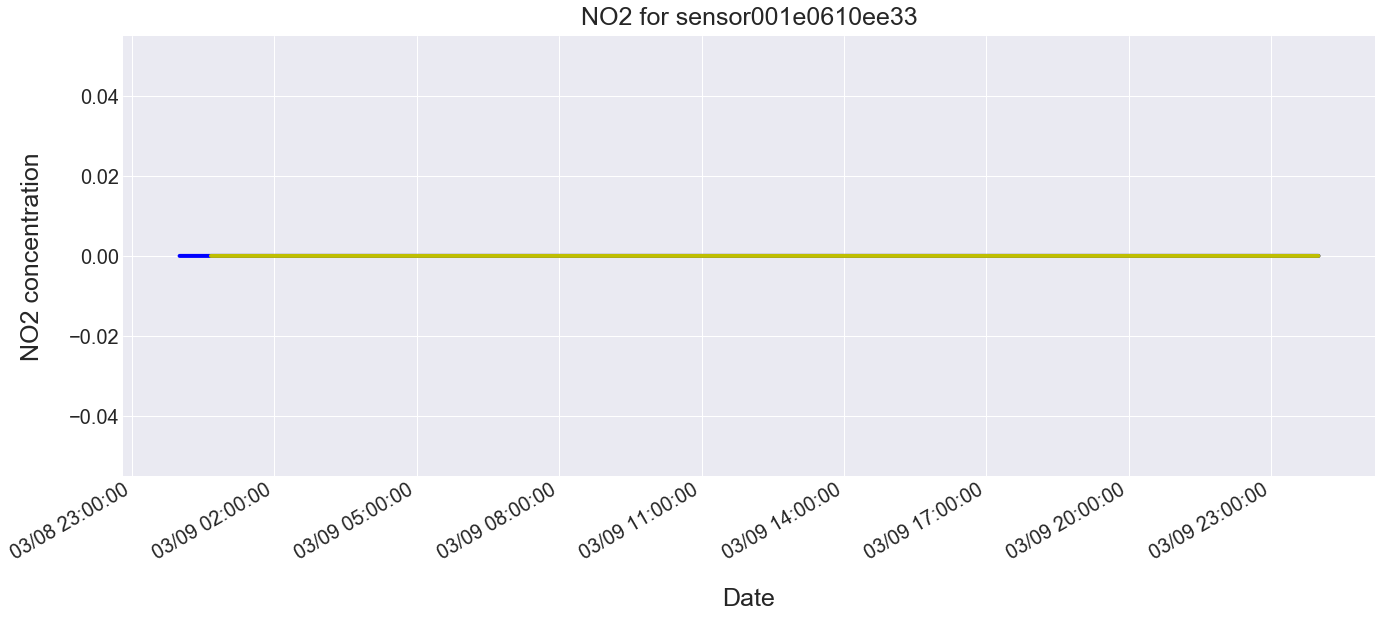

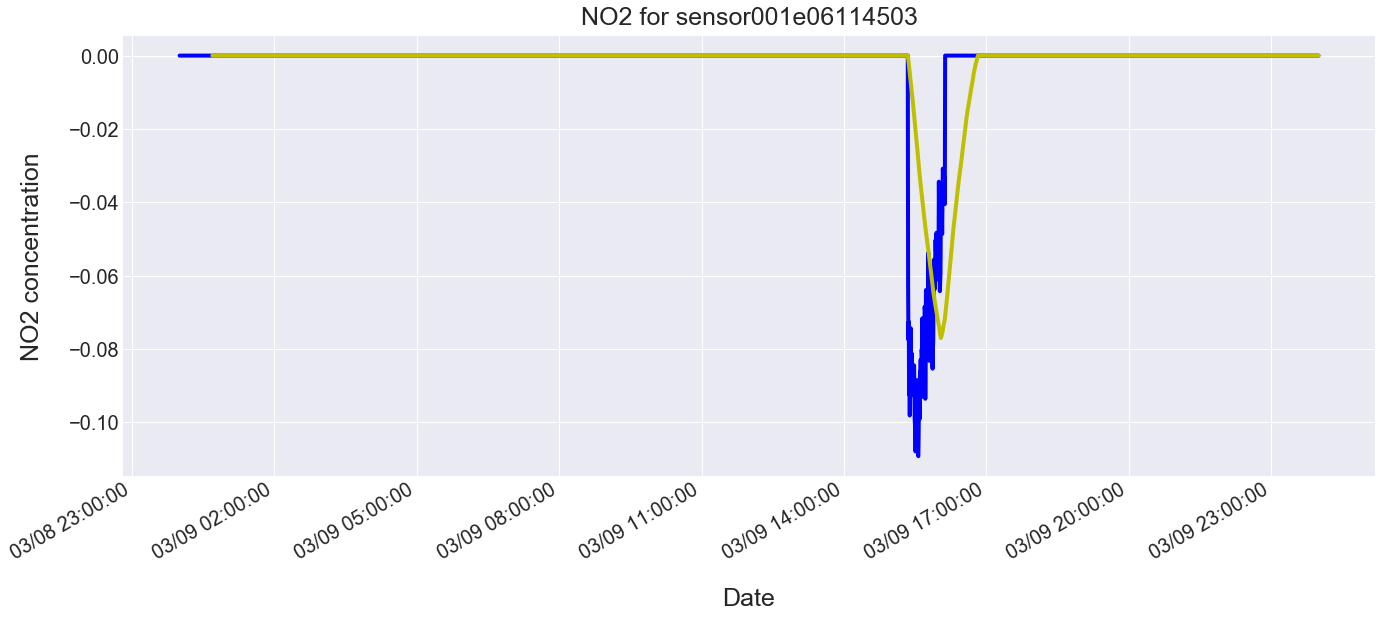

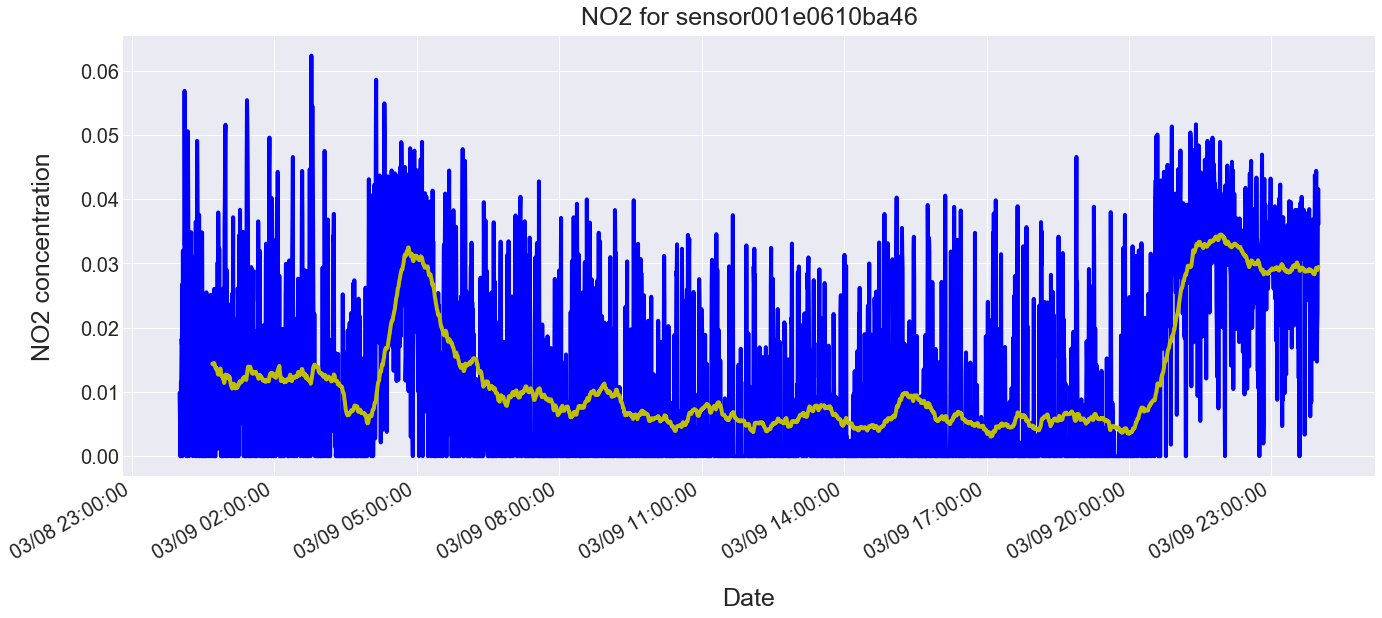

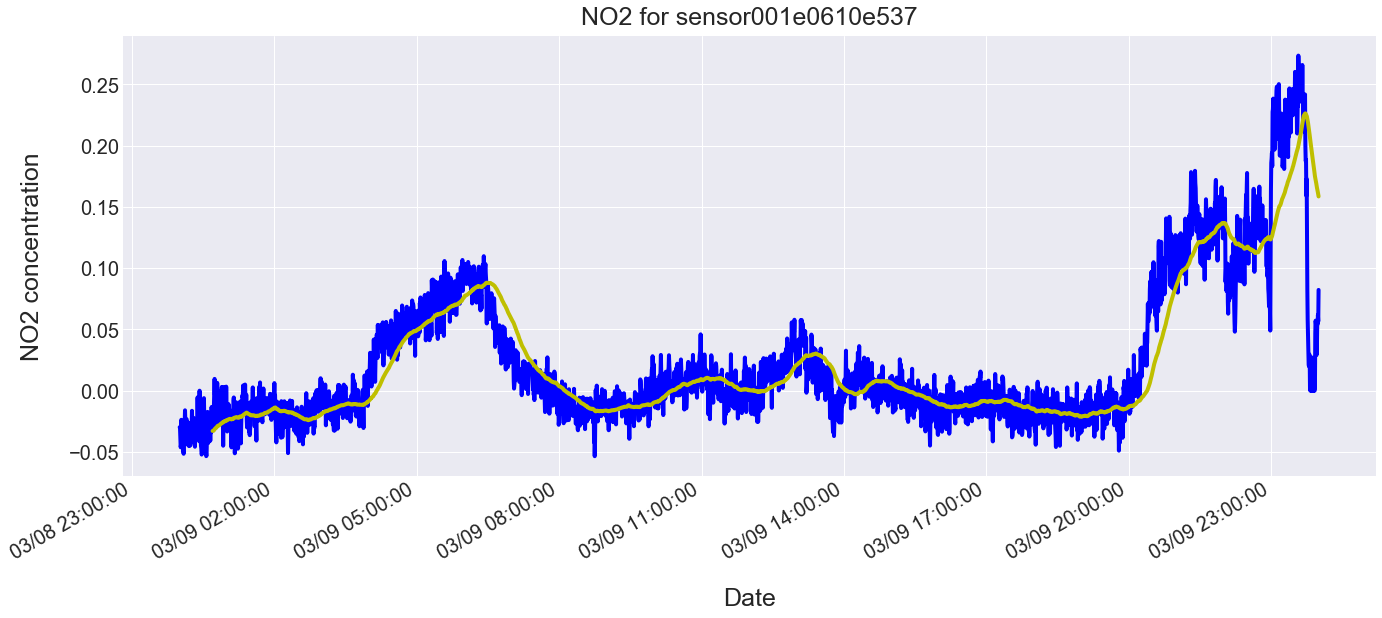

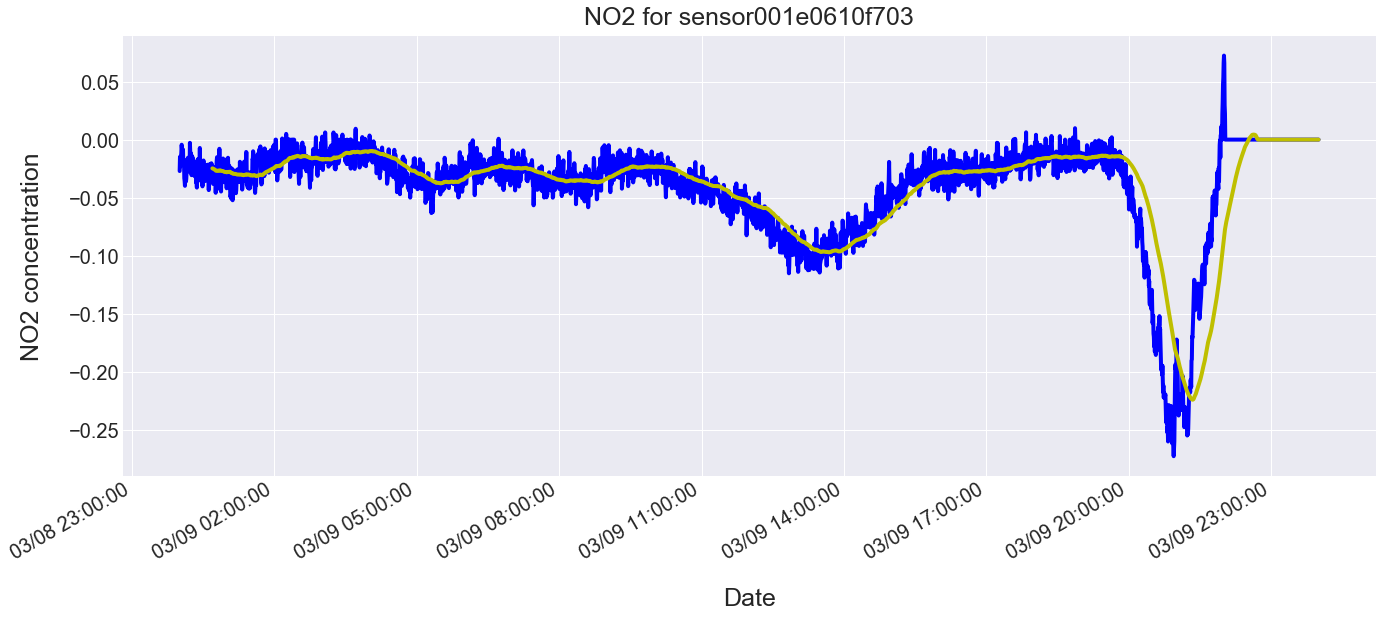

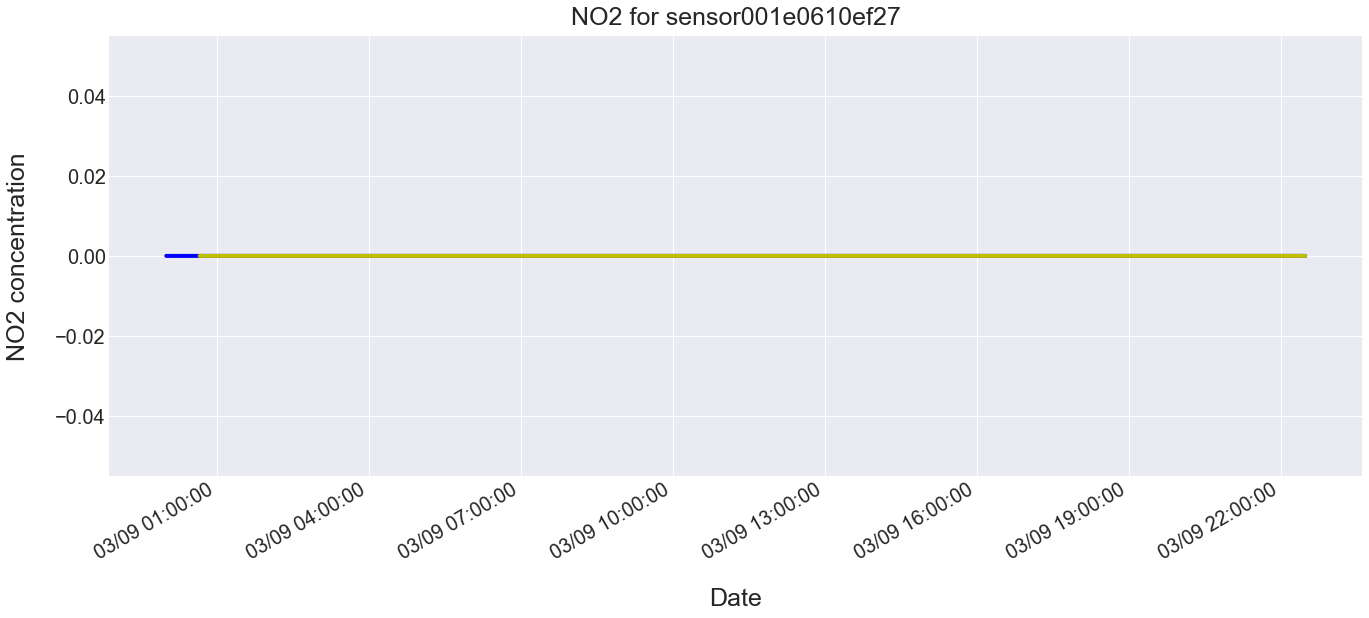

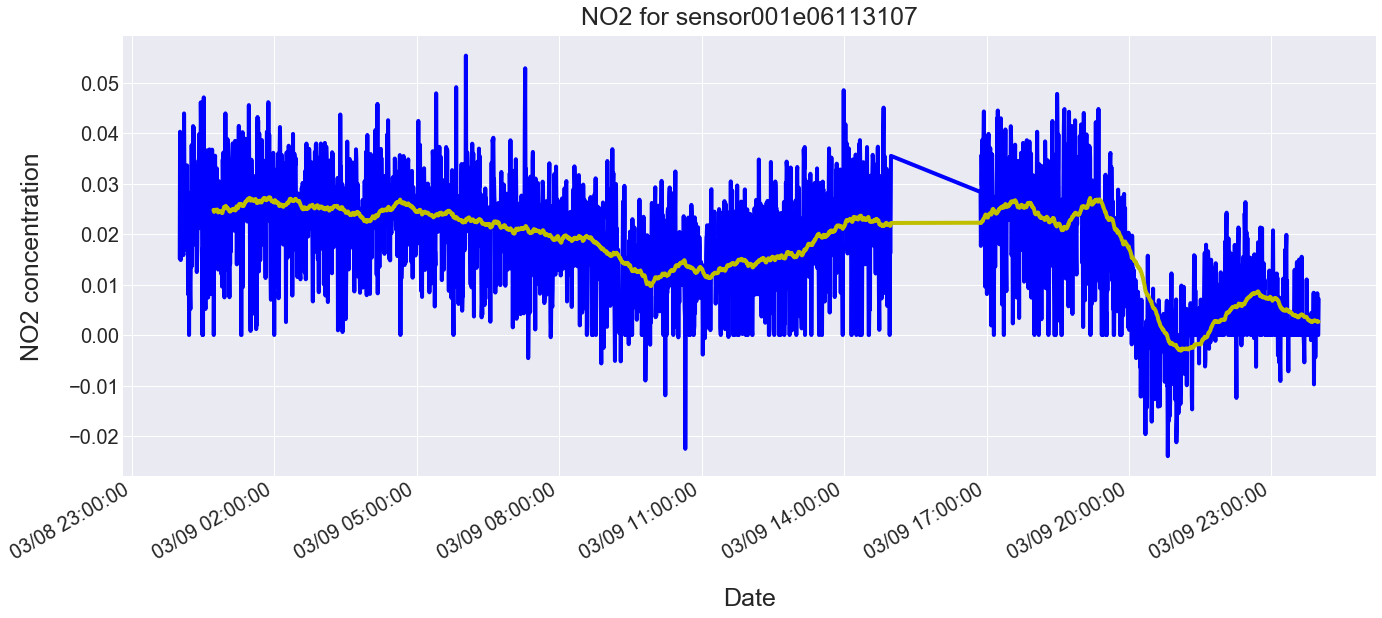

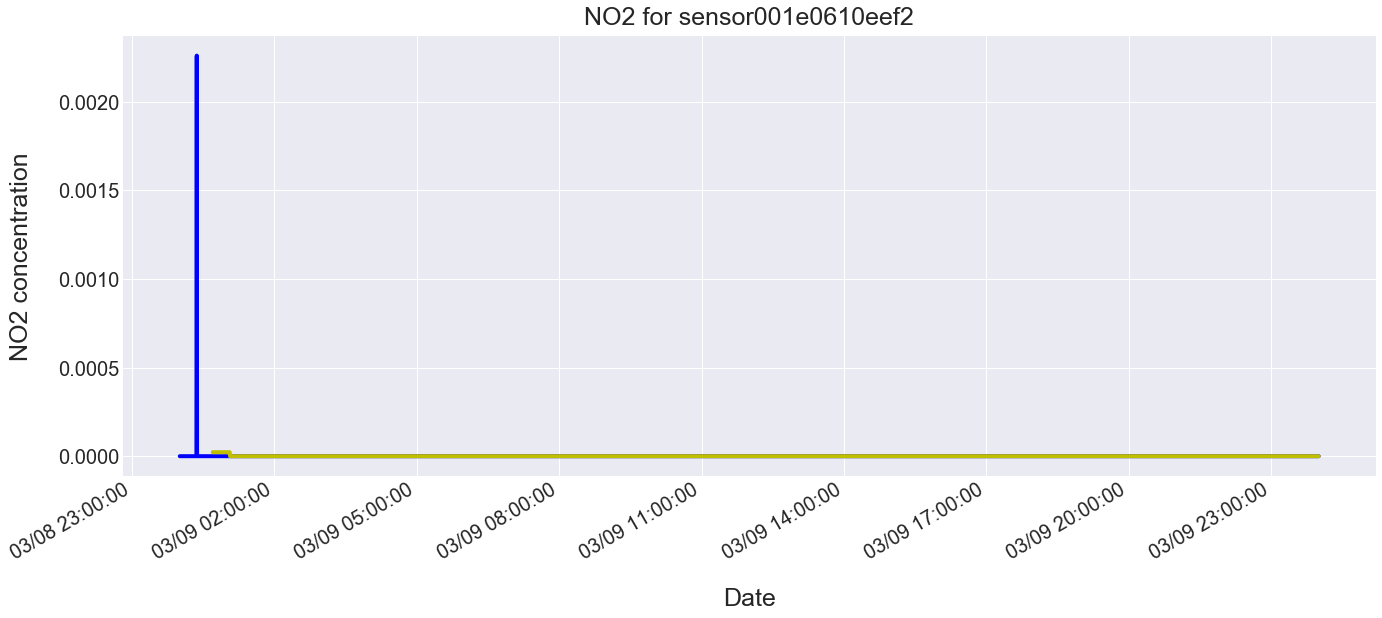

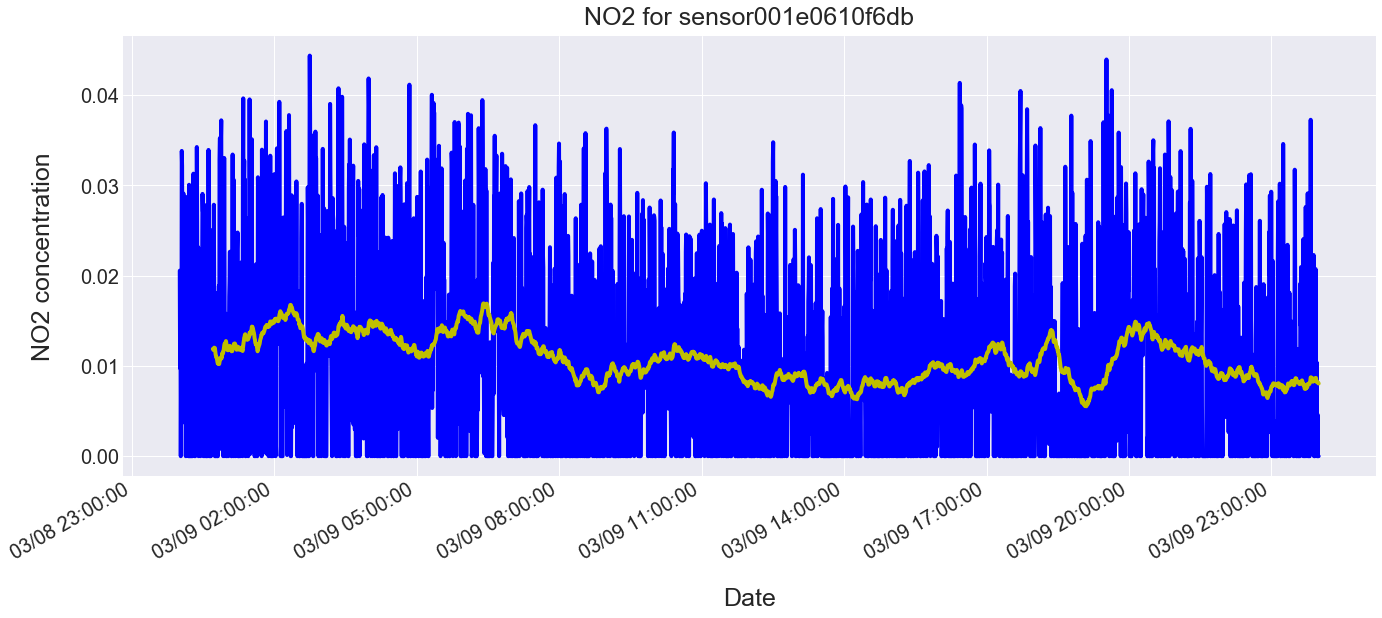

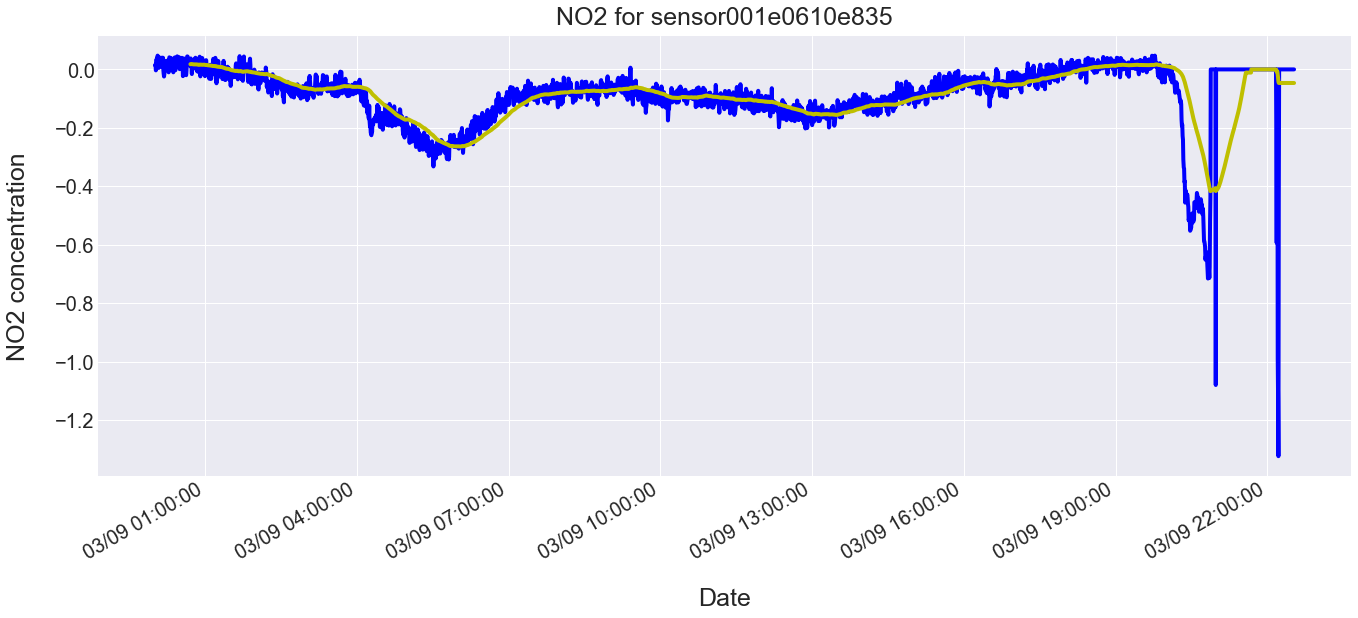

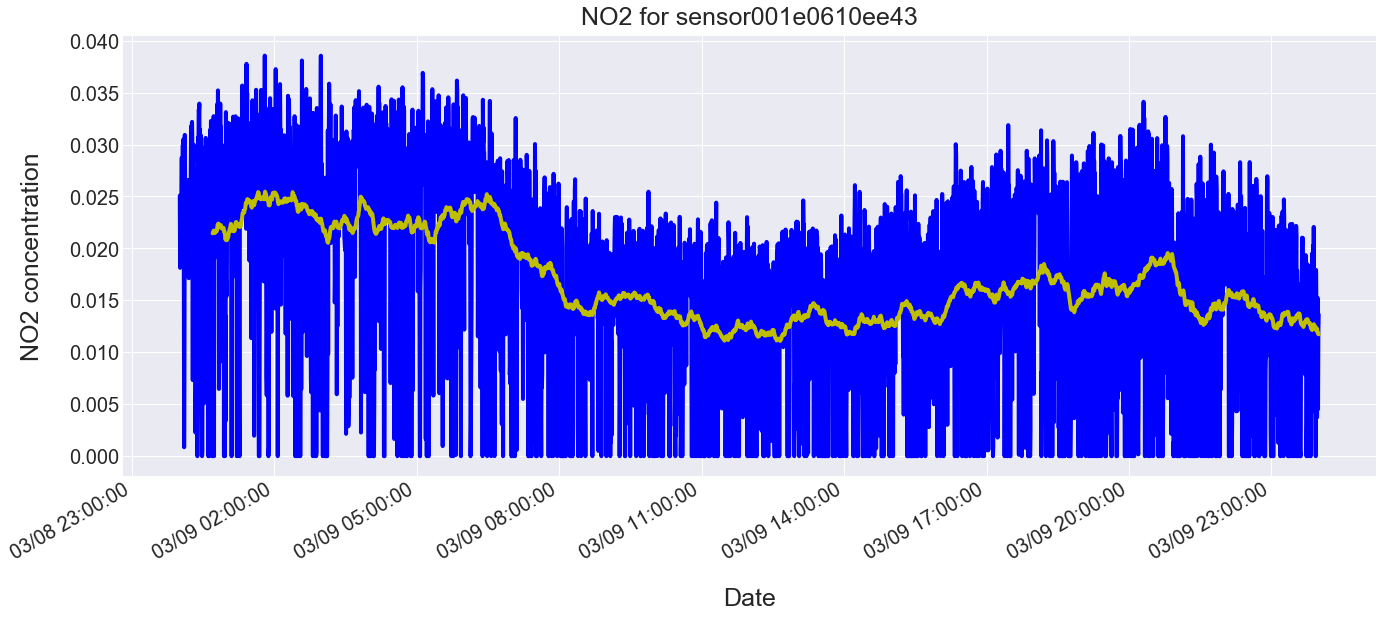

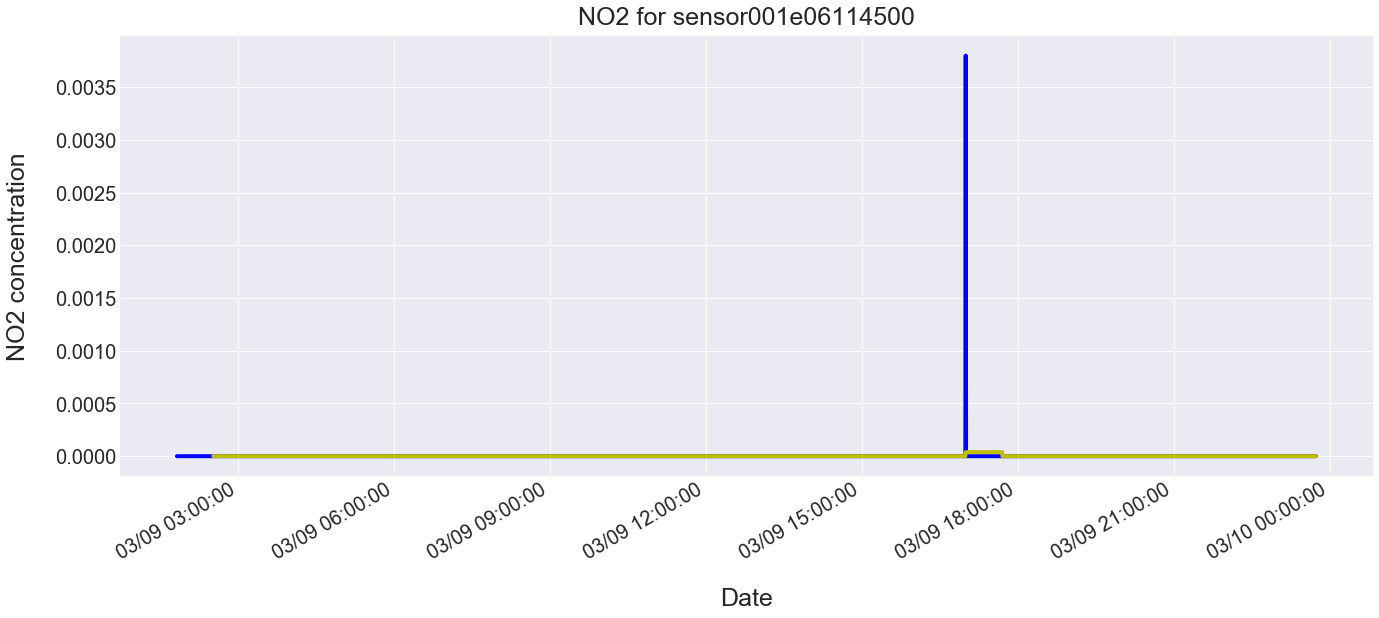

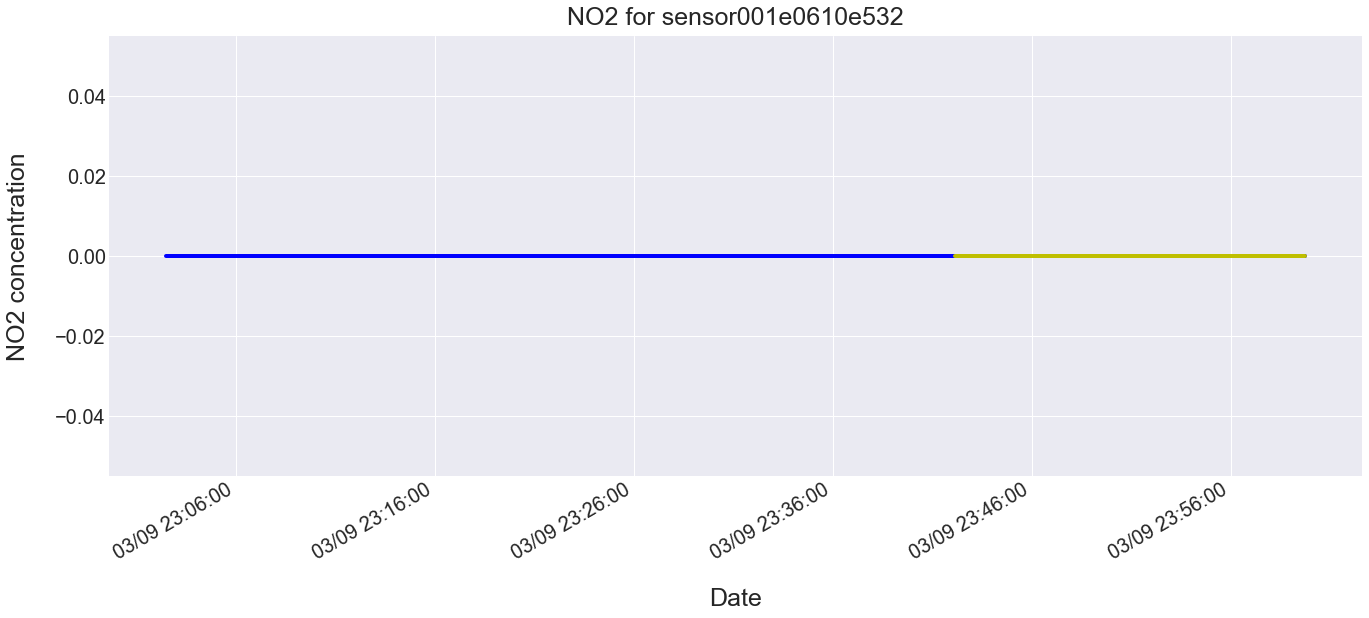

In [68]:
for node in NO2_nodes:
    NO2_data_node = NO2_data.loc[NO2_data['node_id'] == node].copy()
    NO2_data_node.timestamp = pd.to_datetime(NO2_data_node.timestamp)

    NO2_data_node.value_hrf = pd.to_numeric(NO2_data_node['value_hrf'], errors='coerce').fillna(0)
    plt.style.use('seaborn-darkgrid')

    # Convert that column into a datetime datatype
    NO2_data_node['timestamp'] = pd.to_datetime(NO2_data_node['timestamp'])
    # Set the datetime column as the index
    NO2_data_node.index = NO2_data_node['timestamp']
    NO2_data_node['MA'] = NO2_data_node['value_hrf'].rolling(window=100).mean()

    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    NO2_data_node.value_hrf.plot(ax = ax, figsize=[20,9], color="b", linewidth=4)
    NO2_data_node.MA.plot(ax = ax, figsize=[20,9], color="y", linewidth=4)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M:%S'))

    plt.tick_params(axis='both', which='both', labelsize=20)

    # Set title and labels
    ax.set_title('NO2 for sensor' + node,fontsize = 25, fontdict = {'verticalalignment':'bottom'})
    ax.set_xlabel('Date',fontsize = 25, labelpad=25)
    ax.set_ylabel('NO2 concentration',fontsize = 25, labelpad=25)

In [69]:
O3_data = air_data.loc[air_data['sensor'] == 'o3']
O3_nodes = O3_data.node_id.unique()

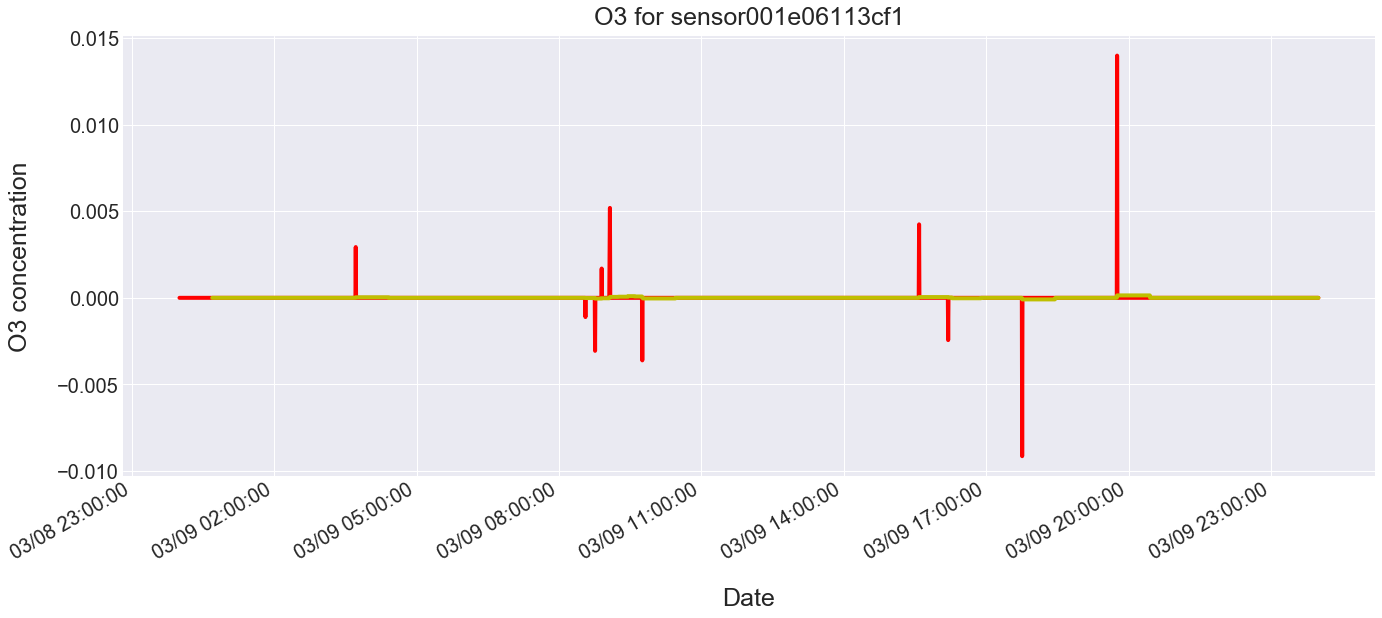

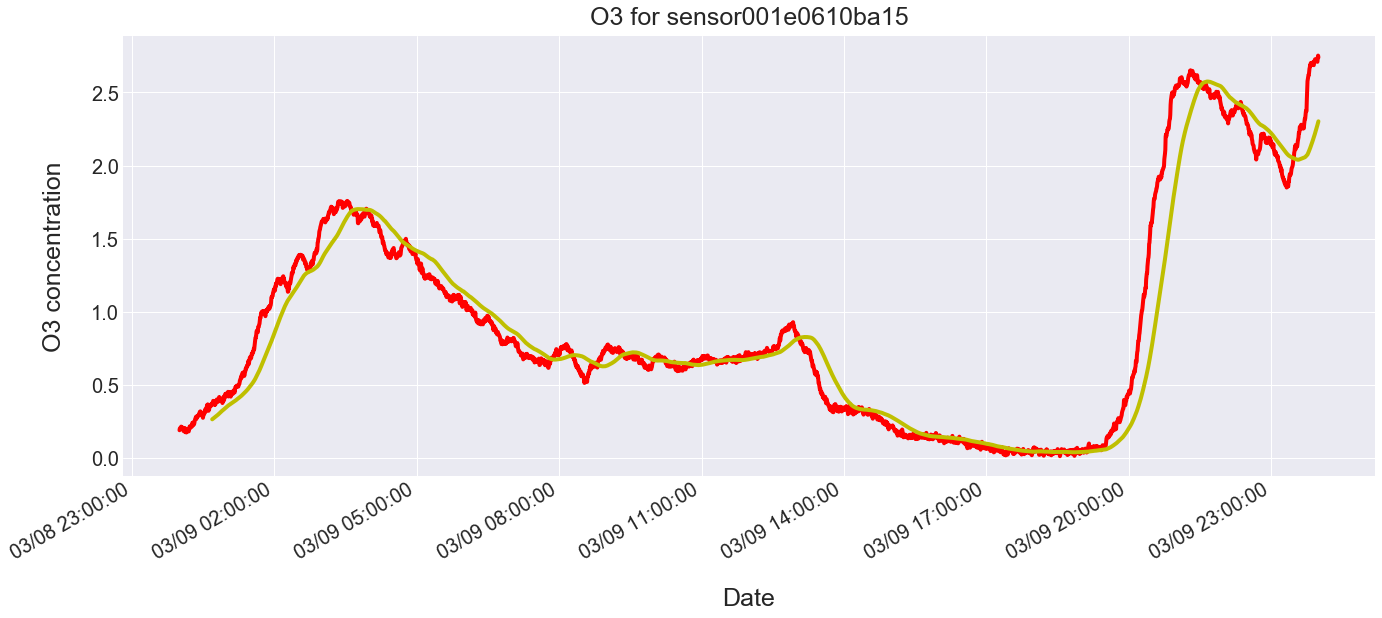

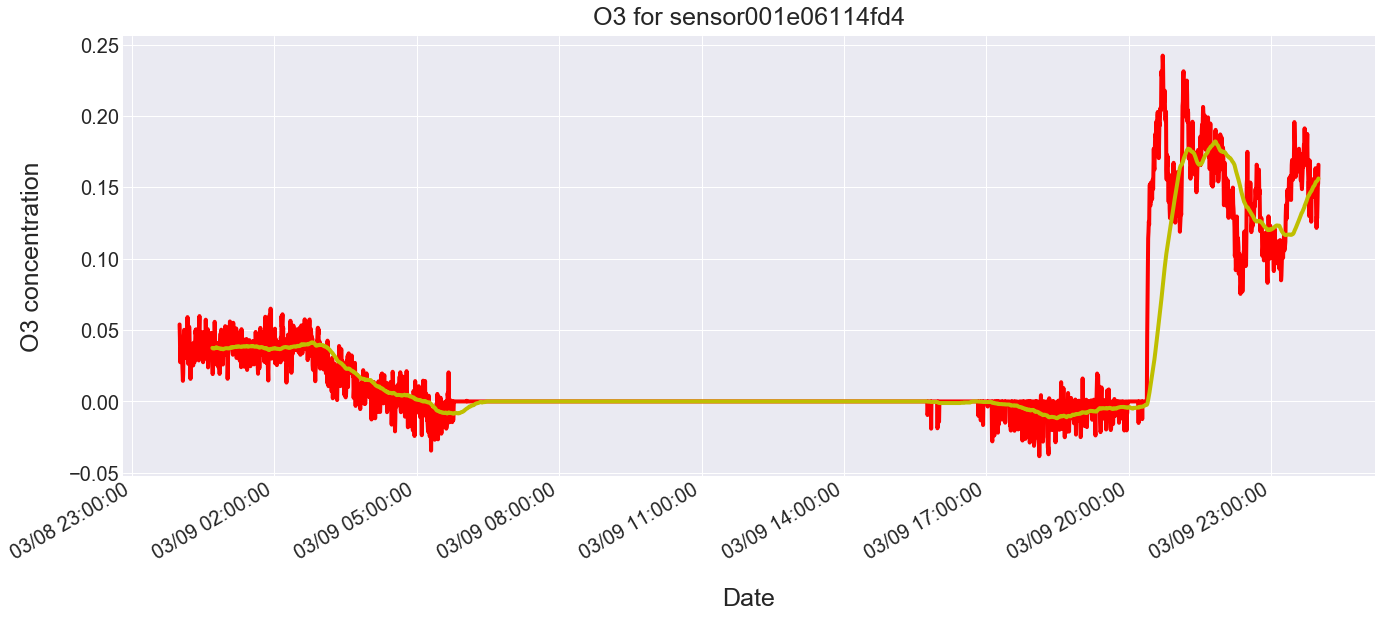

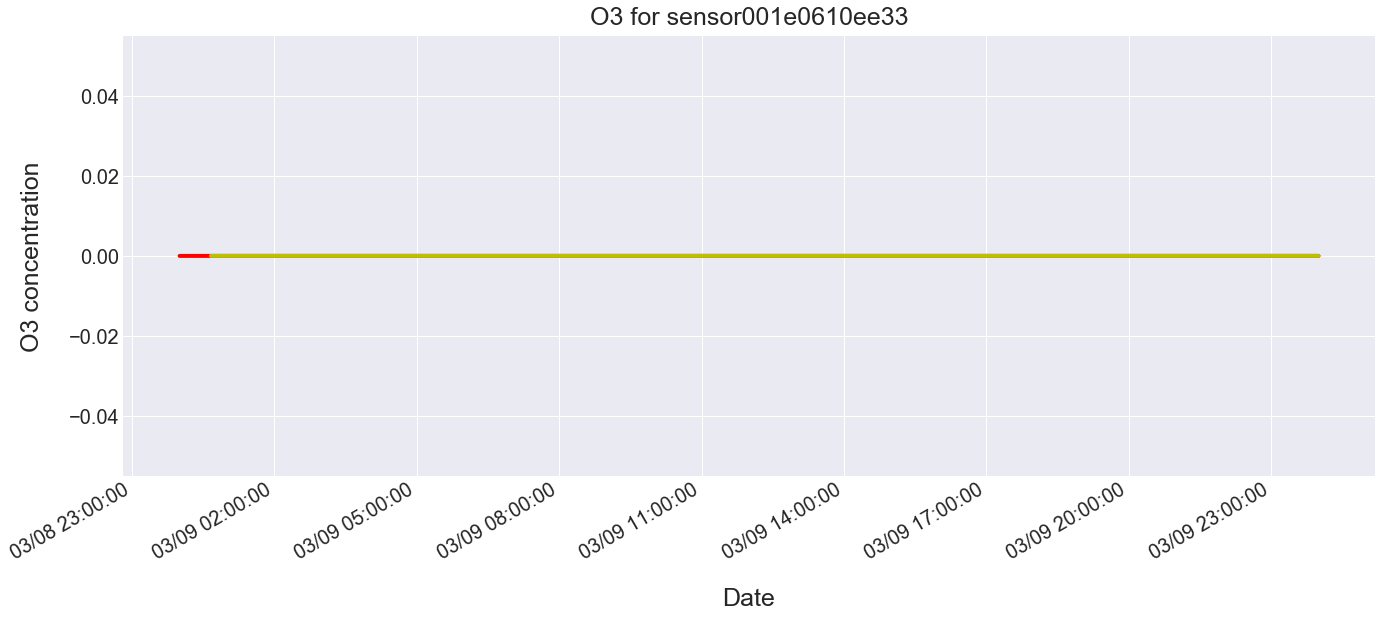

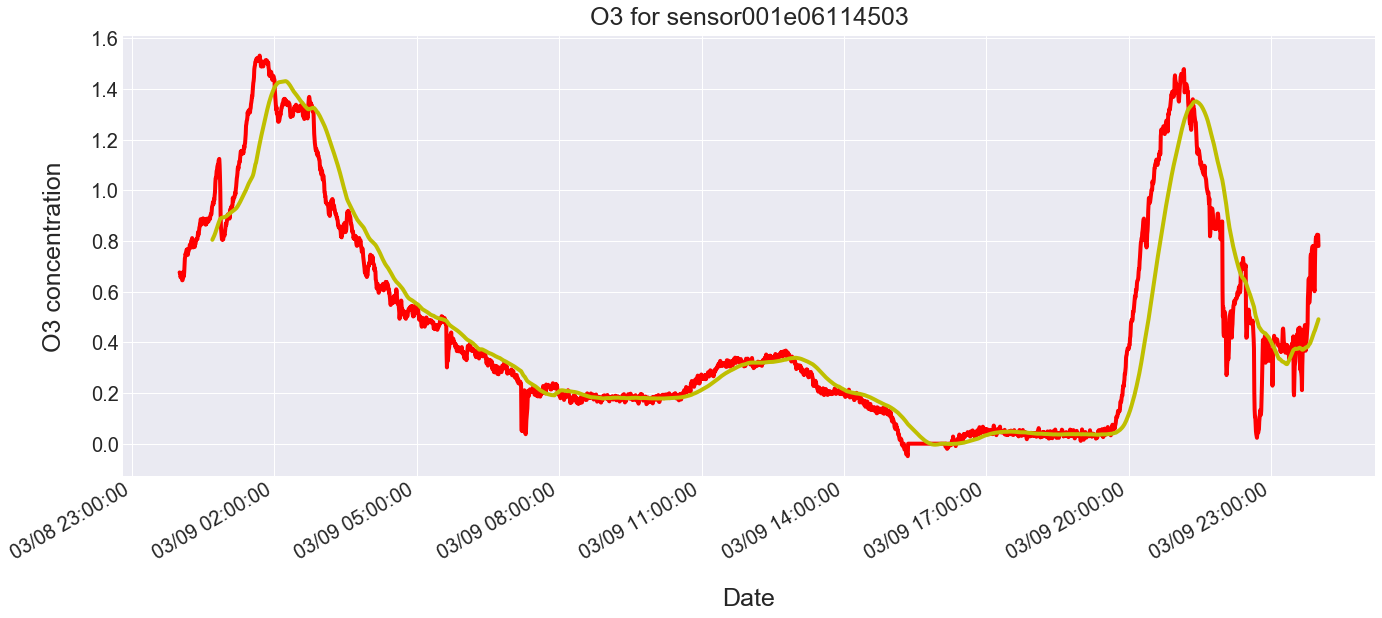

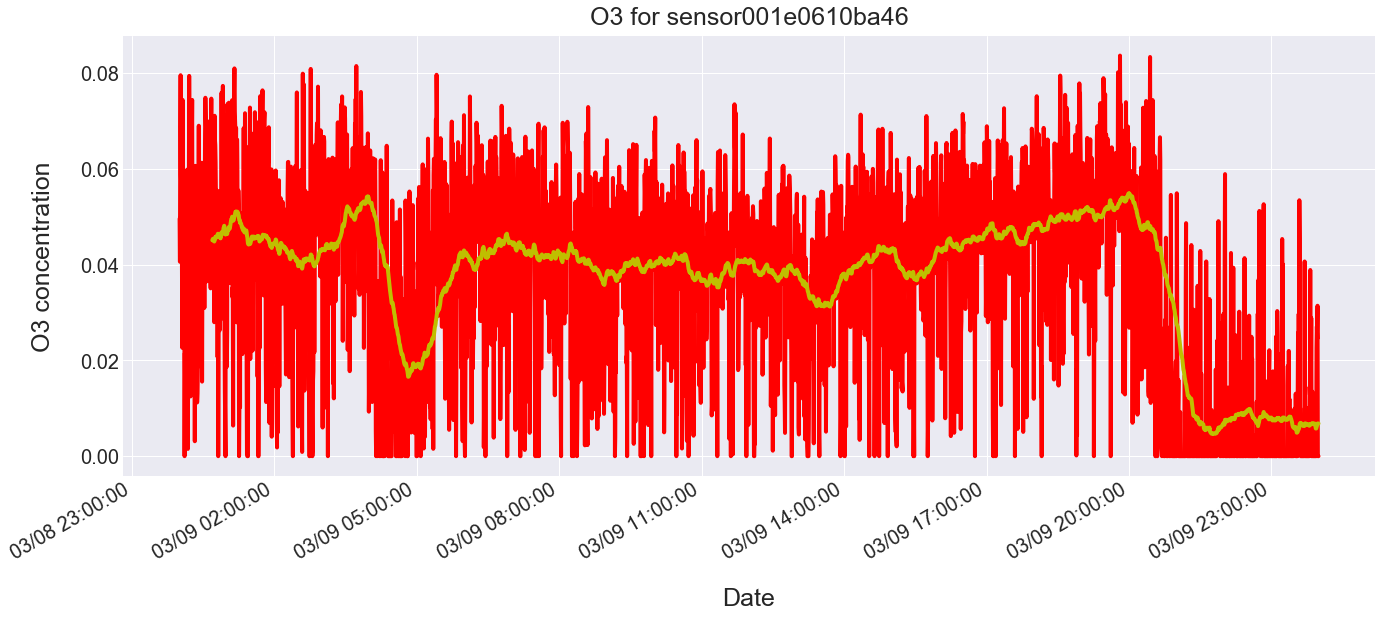

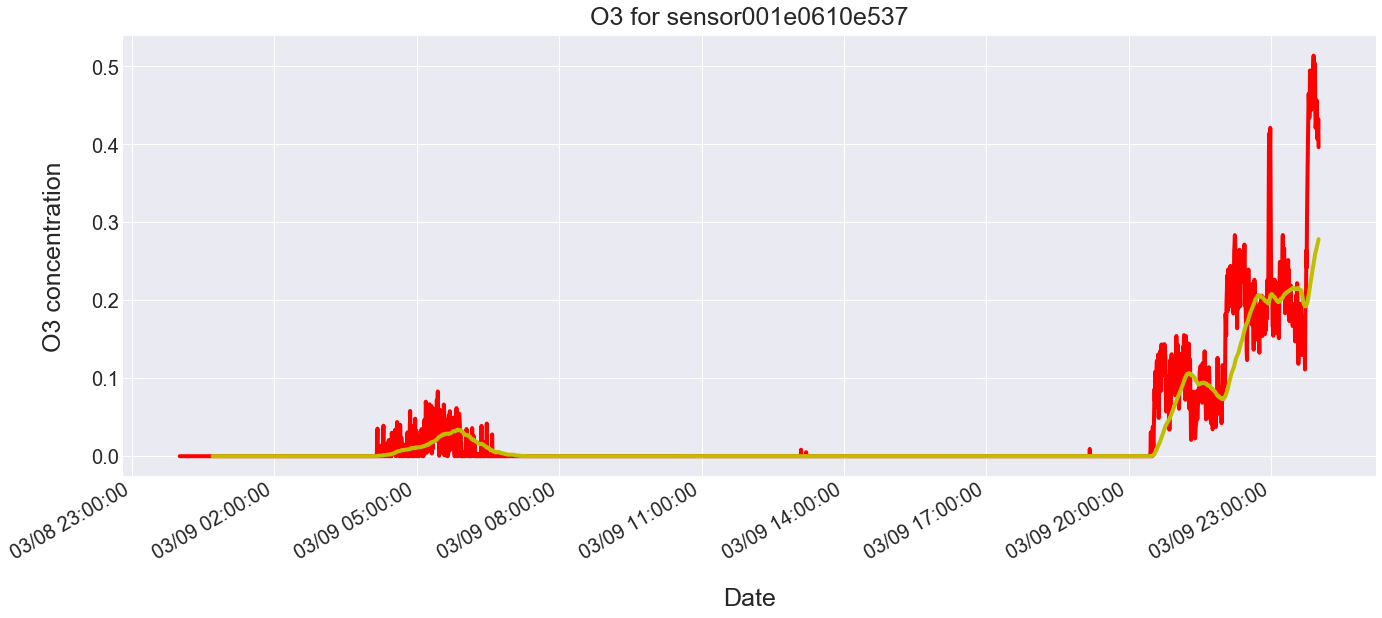

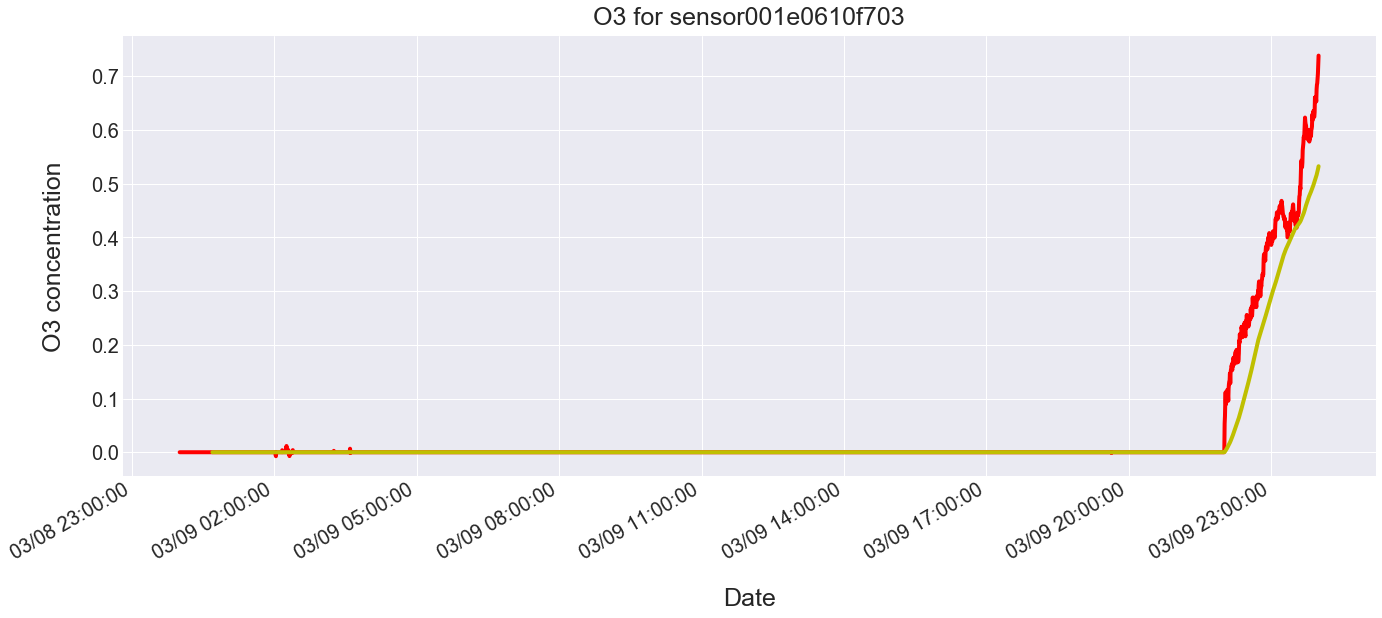

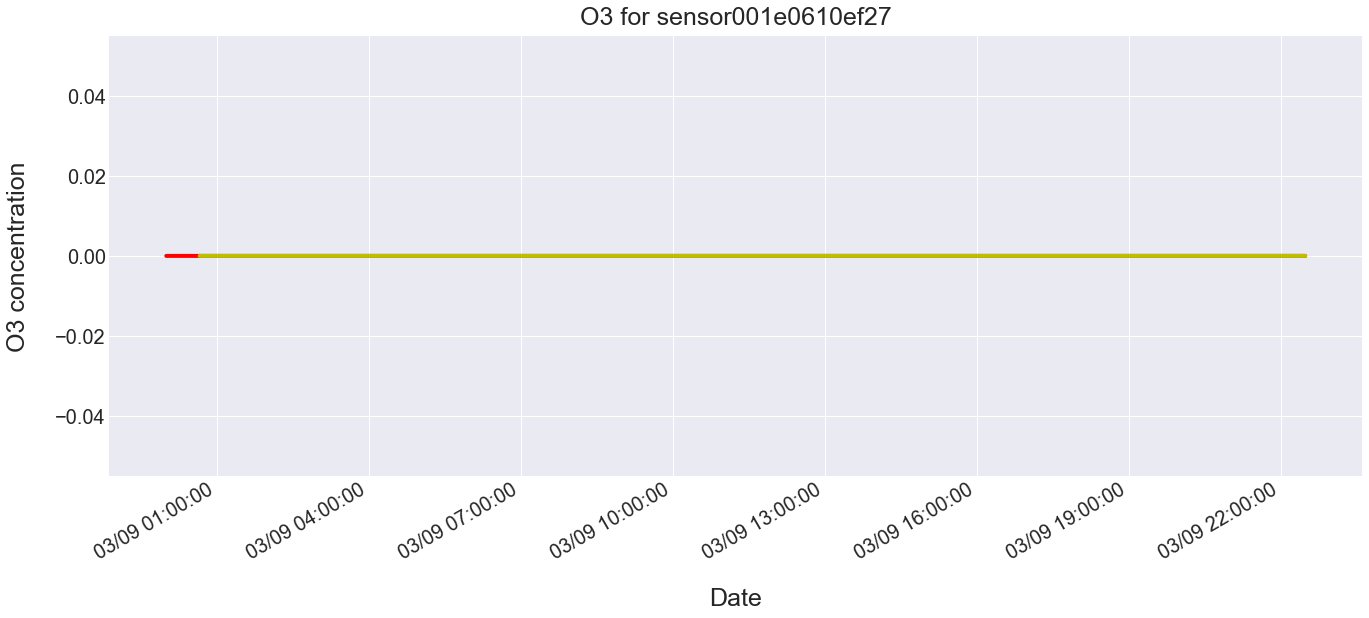

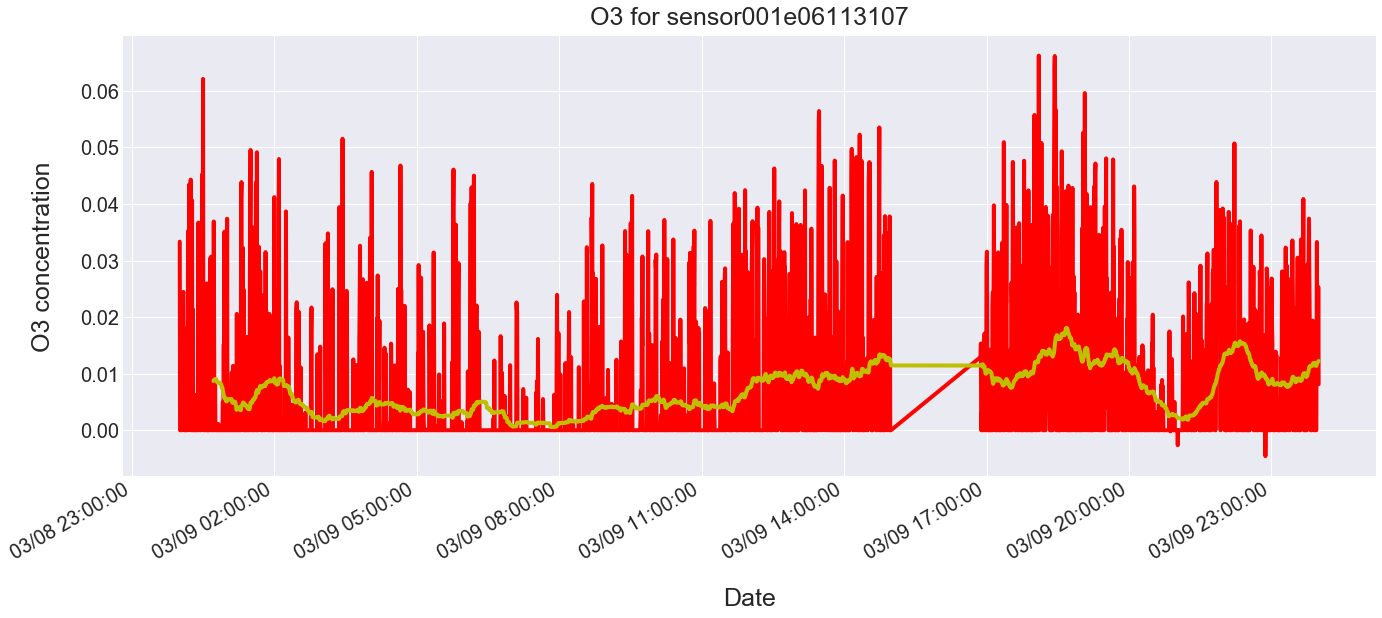

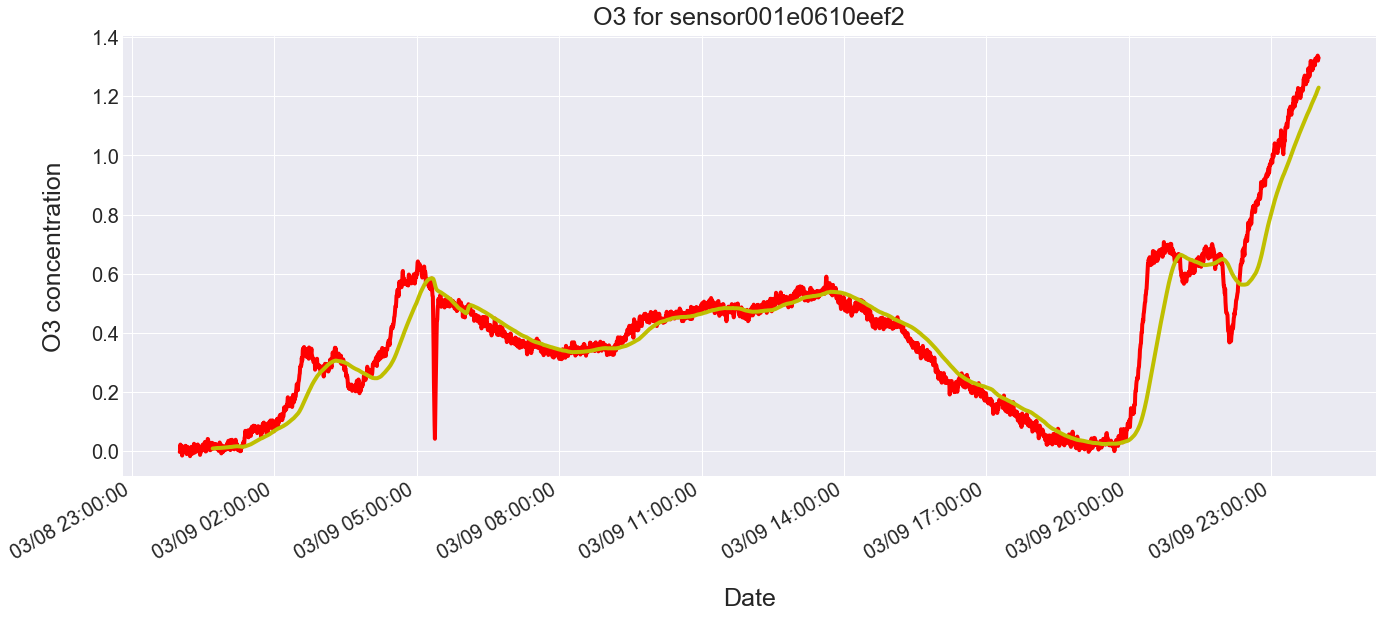

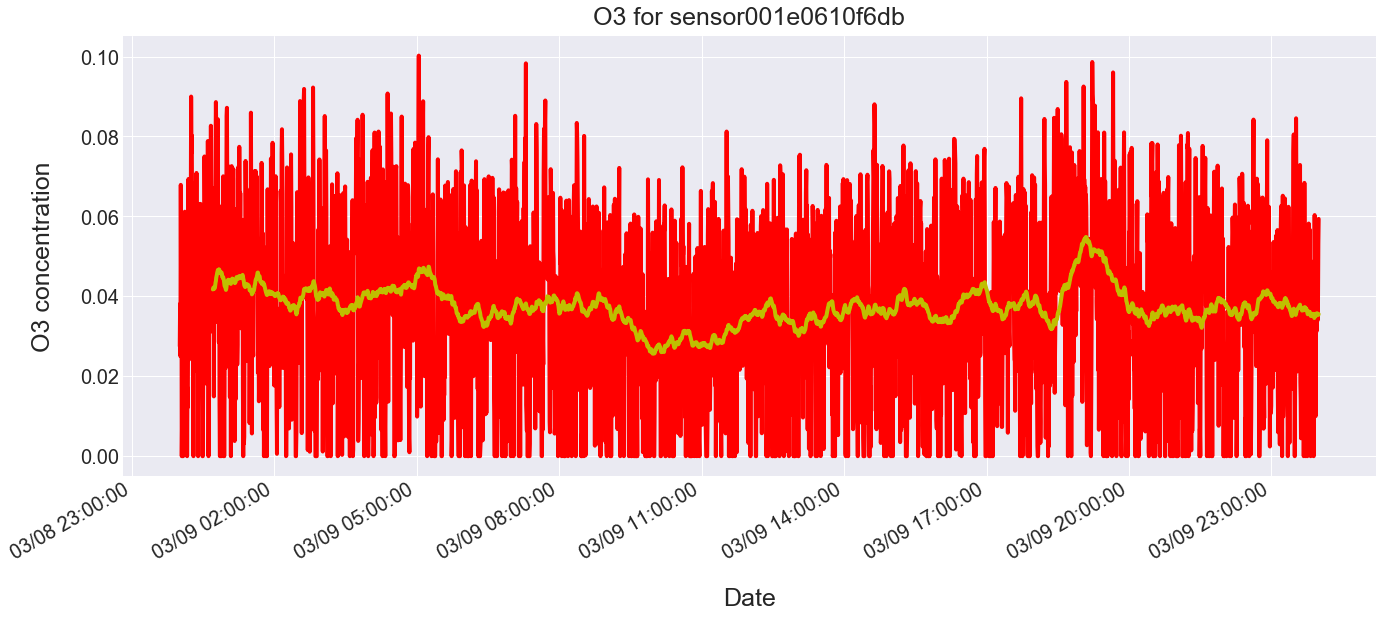

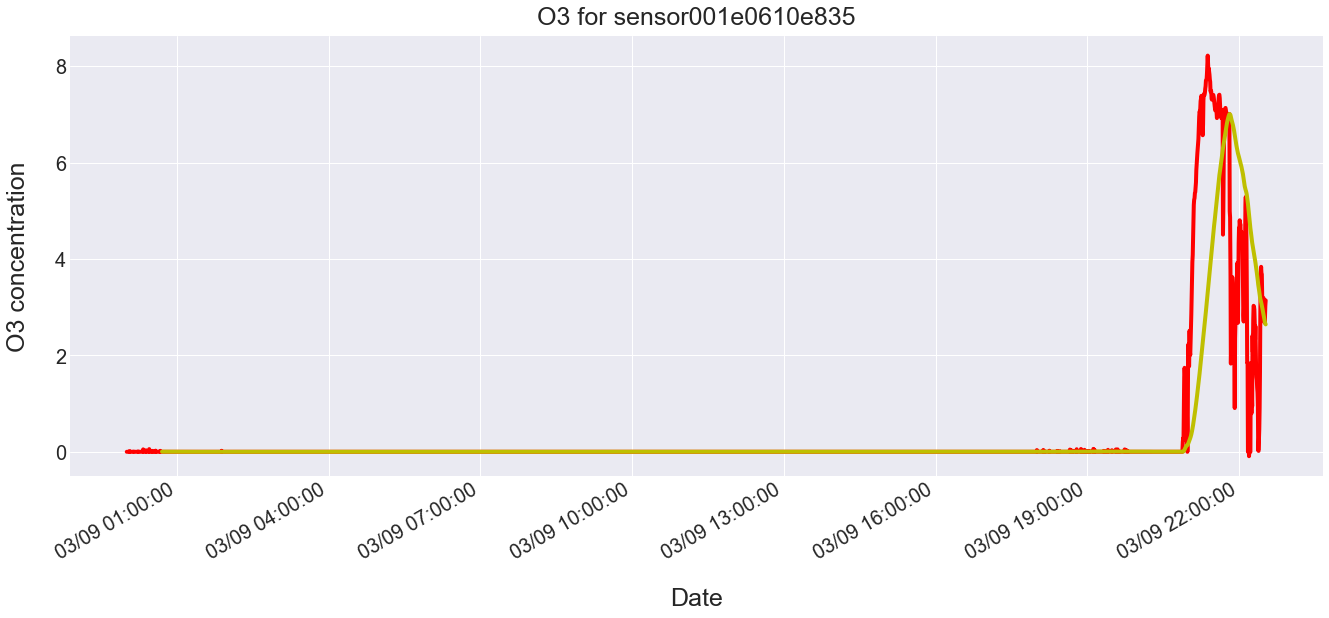

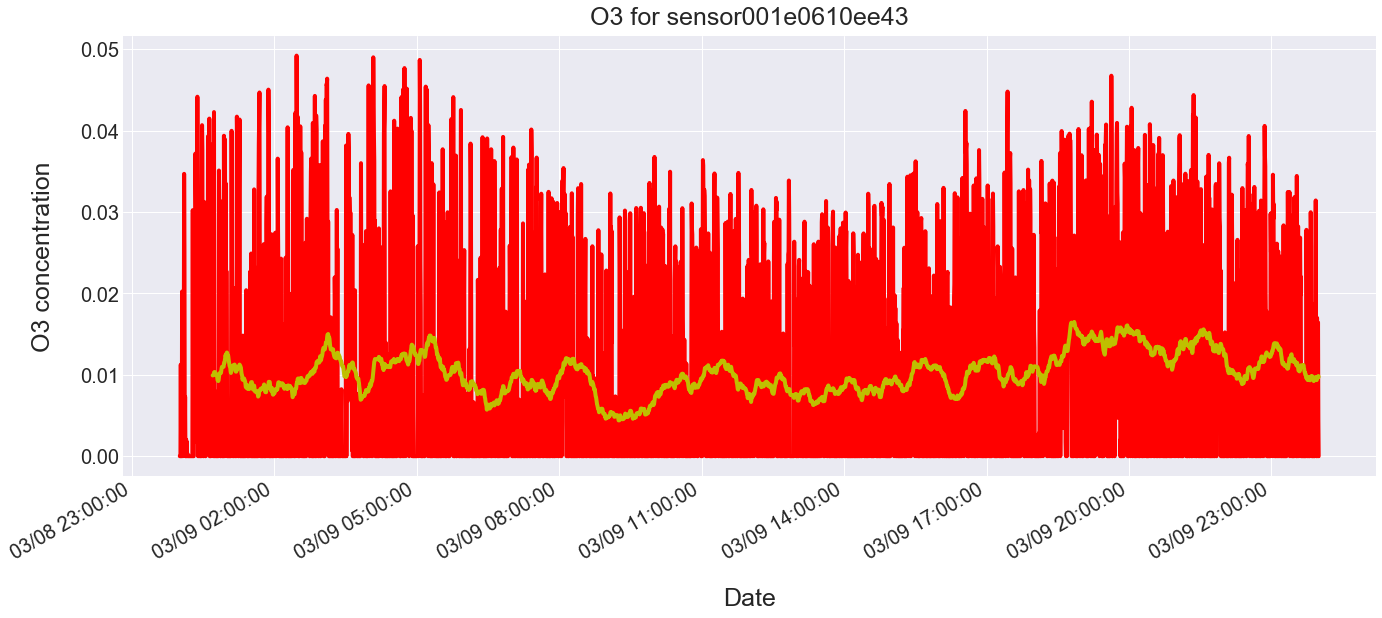

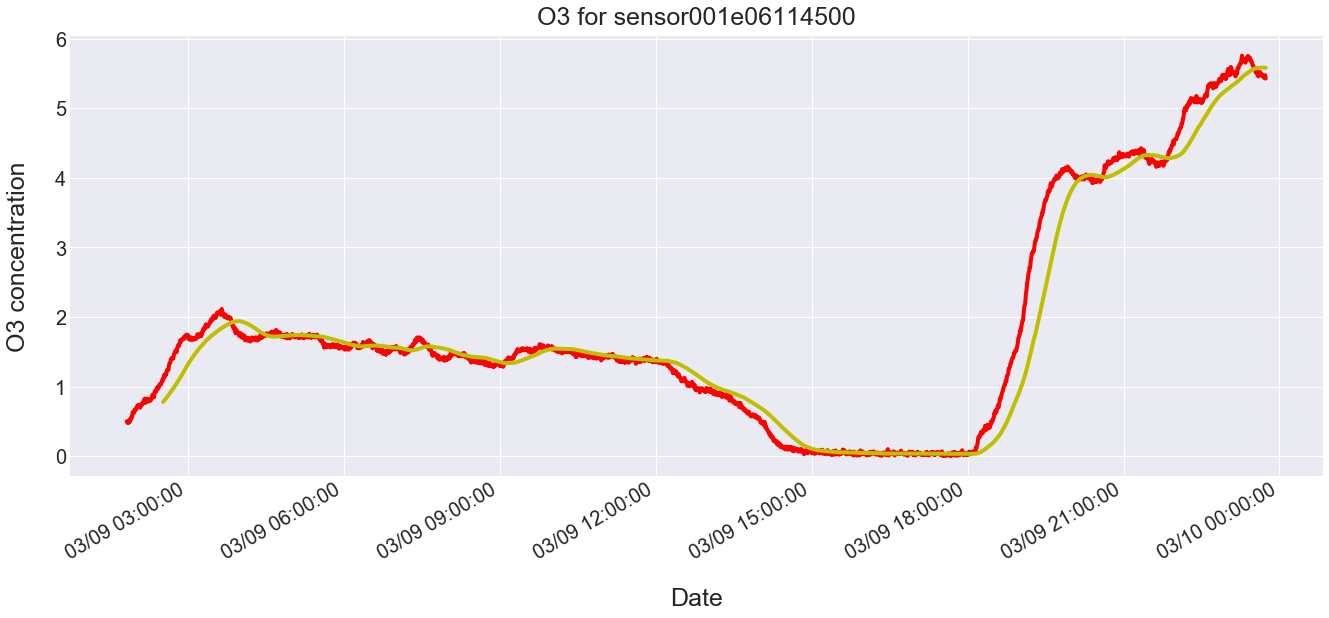

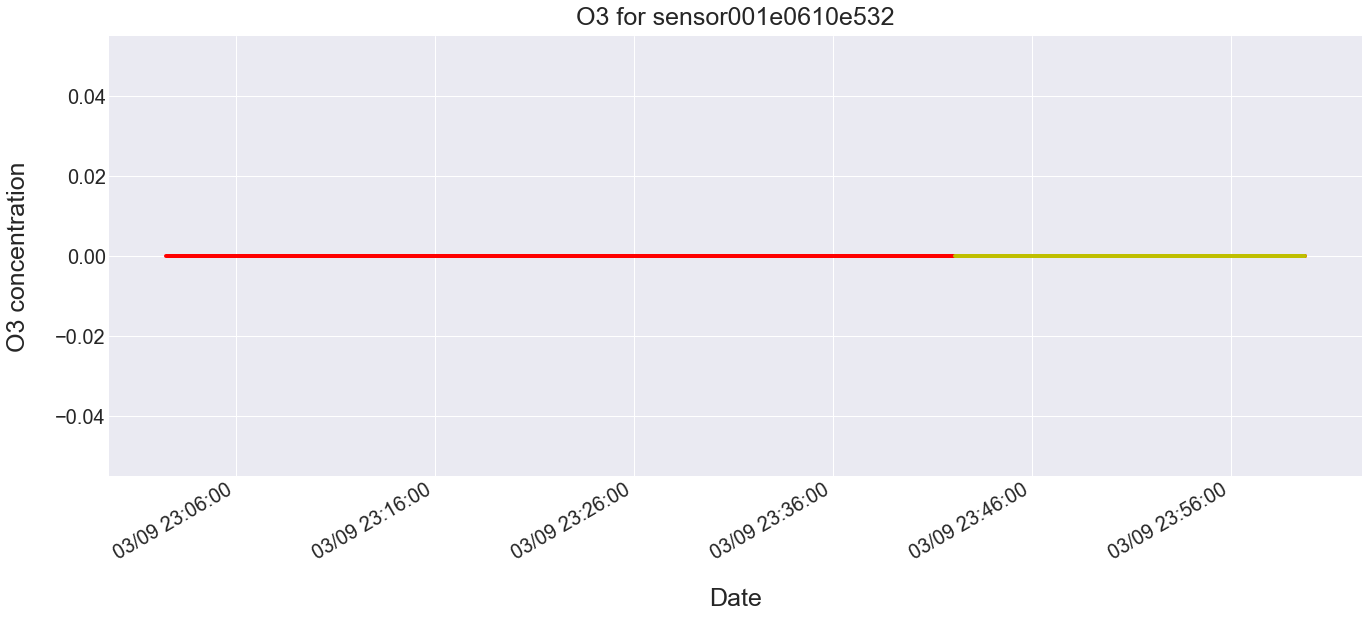

In [71]:
for node in O3_nodes:
    O3_data_node = O3_data.loc[O3_data['node_id'] == node].copy()
    O3_data_node.timestamp = pd.to_datetime(O3_data_node.timestamp)

    O3_data_node.value_hrf = pd.to_numeric(O3_data_node['value_hrf'], errors='coerce').fillna(0)
    plt.style.use('seaborn-darkgrid')

    # Convert that column into a datetime datatype
    O3_data_node['timestamp'] = pd.to_datetime(O3_data_node['timestamp'])
    # Set the datetime column as the index
    O3_data_node.index = O3_data_node['timestamp']
    O3_data_node['MA'] = O3_data_node['value_hrf'].rolling(window=100).mean()

    plt.style.use('seaborn-darkgrid')

    fig, ax = plt.subplots()
    O3_data_node.value_hrf.plot(ax = ax, figsize=[20,9], color="r", linewidth=4)
    O3_data_node.MA.plot(ax = ax, figsize=[20,9], color="y", linewidth=4)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M:%S'))

    plt.tick_params(axis='both', which='both', labelsize=20)

    # Set title and labels
    ax.set_title('O3 for sensor' + node,fontsize = 25, fontdict = {'verticalalignment':'bottom'})
    ax.set_xlabel('Date',fontsize = 25, labelpad=25)
    ax.set_ylabel('O3 concentration',fontsize = 25, labelpad=25)